# **Amazon Sales Report Analysis**

# **Data Loading**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Amazon Sale Report
amazon_df = pd.read_csv('/kaggle/input/dv-dataset/Amazon Sale Report.csv')
print("Amazon Sale Report:")
print(amazon_df.head())
print("\n")

# Load Cloud Warehouse Comparison Chart
warehouse_df = pd.read_csv('/kaggle/input/dv-dataset/Cloud Warehouse Compersion Chart.csv')
print("Cloud Warehouse Comparison Chart:")
print(warehouse_df.head())
print("\n")

# Load Expense IIGF
expense_df = pd.read_csv('/kaggle/input/dv-dataset1/Expense IIGF.csv')
print("Expense IIGF:")
print(expense_df.head())
print("\n")

# Load International Sale Report
international_df = pd.read_csv('/kaggle/input/dv-dataset1/International sale Report.csv')
print("International Sale Report:")
print(international_df.head())
print("\n")

# Load May-2022 Sales Data
may2022_df = pd.read_csv('/kaggle/input/dv-dataset1/May-2022.csv')
print("May-2022 Sales Data:")
print(may2022_df.head())
print("\n")

# Load P & L March 2021
pnl_df = pd.read_csv('/kaggle/input/dv-dataset1/P  L March 2021.csv')
print("P & L March 2021:")
print(pnl_df.head())
print("\n")

# Load Sale Report
sale_report_df = pd.read_csv('/kaggle/input/dv-dataset1/Sale Report.csv')
print("Sale Report:")
print(sale_report_df.head())
print("\n")


Amazon Sale Report:
   index             Order_ID Order_Date                  Order_Status  \
0      0  405-8078784-5731545  4/30/2022                     Cancelled   
1      1  171-9198151-1101146  4/30/2022  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  4/30/2022                       Shipped   
3      3  403-9615377-8133951  4/30/2022                     Cancelled   
4      4  407-1069790-7240320  4/30/2022                       Shipped   

  Fulfillment_Type Sales_Channel Shipping_Service_Level Product_Style  \
0         Merchant     Amazon.in               Standard        SET389   
1         Merchant     Amazon.in               Standard       JNE3781   
2           Amazon     Amazon.in              Expedited       JNE3371   
3         Merchant     Amazon.in               Standard         J0341   
4           Amazon     Amazon.in              Expedited       JNE3671   

       Product_SKU Product_Category  ... Quantity Currency Sale_Amount  \
0   SET389-KR-NP-S    

# **Data Overview**

In [2]:
print("Amazon Sale Report:")
print("\nShape:", amazon_df.shape)
print("\nColumns:", amazon_df.columns.tolist())
print("\nData types:\n", amazon_df.dtypes)
print("\nMissing values:\n", amazon_df.isnull().sum())


Amazon Sale Report:

Shape: (128975, 23)

Columns: ['index', 'Order_ID', 'Order_Date', 'Order_Status', 'Fulfillment_Type', 'Sales_Channel', 'Shipping_Service_Level', 'Product_Style', 'Product_SKU', 'Product_Category', 'Product_Size', 'Amazon_Standard_ID', 'Courier_Status', 'Quantity', 'Currency', 'Sale_Amount', 'Shipping_City', 'Shipping_State', 'Shipping_Postal_Code', 'Shipping_Country', 'Promotion_IDs', 'Business_to_Business', 'Fulfilled_By']

Data types:
 index                       int64
Order_ID                   object
Order_Date                 object
Order_Status               object
Fulfillment_Type           object
Sales_Channel              object
Shipping_Service_Level     object
Product_Style              object
Product_SKU                object
Product_Category           object
Product_Size               object
Amazon_Standard_ID         object
Courier_Status             object
Quantity                    int64
Currency                   object
Sale_Amount               f

In [3]:
print("Cloud Warehouse Comparison Chart:")
print("\nShape:", warehouse_df.shape)
print("\nColumns:", warehouse_df.columns.tolist())
print("\nData types:\n", warehouse_df.dtypes)
print("\nMissing values:\n", warehouse_df.isnull().sum())
print("\n" + "="*50 + "\n")

print("Expense IIGF:")
print(expense_df.head())
print("\nShape:", expense_df.shape)
print("\nColumns:", expense_df.columns.tolist())
print("\nData types:\n", expense_df.dtypes)
print("\nMissing values:\n", expense_df.isnull().sum())

print("International Sale Report:")
print("\nShape:", international_df.shape)
print("\nColumns:", international_df.columns.tolist())
print("\nData types:\n", international_df.dtypes)
print("\nMissing values:\n", international_df.isnull().sum())

print("May-2022 Sales Data:")
print("\nShape:", may2022_df.shape)
print("\nColumns:", may2022_df.columns.tolist())
print("\nData types:\n", may2022_df.dtypes)
print("\nMissing values:\n", may2022_df.isnull().sum())

print("P & L March 2021:")
print("\nShape:", pnl_df.shape)
print("\nColumns:", pnl_df.columns.tolist())
print("\nData types:\n", pnl_df.dtypes)
print("\nMissing values:\n", pnl_df.isnull().sum())

print("Sale Report:")
print("\nShape:", sale_report_df.shape)
print("\nColumns:", sale_report_df.columns.tolist())
print("\nData types:\n", sale_report_df.dtypes)
print("\nMissing values:\n", sale_report_df.isnull().sum())


Cloud Warehouse Comparison Chart:

Shape: (50, 4)

Columns: ['index', 'Shiprocket_Performance', 'Unnamed: 1', 'INCREFF_Performance']

Data types:
 index                      int64
Shiprocket_Performance    object
Unnamed: 1                object
INCREFF_Performance       object
dtype: object

Missing values:
 index                      0
Shiprocket_Performance    29
Unnamed: 1                 9
INCREFF_Performance       22
dtype: int64


Expense IIGF:
   index Received_Amount Unnamed: 1  \
0      0      Particular     Amount   
1      1       6/19/2022       1000   
2      2       6/20/2022       1500   
3      3       6/22/2022        500   
4      4       6/23/2022       2000   

                                      Expense_Amount Unnamed: 3  
0                                         Particular     Amount  
1                                          Large Bag        380  
2  Stationary(Soft Pin, Paper pin for Dupatta, Fe...        170  
3                                            

# **Data Cleaning**

**Handling Missing Values**

Handling Missing Values in Amazon Sales Report

In [4]:
# Step 1: Handle Cancelled Orders
amazon_df.loc[amazon_df['Courier_Status'] == 'Cancelled', 'Sale_Amount'] = 0
amazon_df.loc[amazon_df['Courier_Status'] == 'Cancelled', 'Currency'] = 'INR'

# Step 2: Handle Empty Courier_Status
amazon_df.loc[amazon_df['Courier_Status'].isnull(), 'Courier_Status'] = 'Adjustment'

# Step 3: Fill missing Currency with 'INR'
amazon_df['Currency'].fillna('INR', inplace=True)

# Step 4: Verify and handle any remaining missing Sale_Amount
remaining_missing = amazon_df[amazon_df['Sale_Amount'].isnull()]
print("Remaining missing Sale_Amount:", len(remaining_missing))

if len(remaining_missing) > 0:
    print(remaining_missing[['Courier_Status', 'Quantity', 'Currency', 'Sale_Amount']])
    # For now, let's fill them with 0 (assuming they're cancelled or 0 transactions)
    amazon_df['Sale_Amount'].fillna(0, inplace=True)

# Step 5: Verify the changes
print("\nUnique values in Courier_Status:", amazon_df['Courier_Status'].unique())
print("\nMissing values after cleaning:\n", amazon_df.isnull().sum())

# Step 6: Basic statistics after cleaning
print("\nBasic statistics of Sale_Amount:")
print(amazon_df['Sale_Amount'].describe())

# Step 7: Count of orders by Courier_Status
print("\nCount of orders by Courier_Status:")
print(amazon_df['Courier_Status'].value_counts())


Remaining missing Sale_Amount: 1860
       Courier_Status  Quantity Currency  Sale_Amount
29         Adjustment         0      INR          NaN
250        Adjustment         0      INR          NaN
563        Adjustment         0      INR          NaN
672        Adjustment         0      INR          NaN
818        Adjustment         0      INR          NaN
...               ...       ...      ...          ...
128277     Adjustment         0      INR          NaN
128560     Adjustment         0      INR          NaN
128571     Adjustment         0      INR          NaN
128808     Adjustment         0      INR          NaN
128855     Adjustment         0      INR          NaN

[1860 rows x 4 columns]

Unique values in Courier_Status: ['Adjustment' 'Shipped' 'Cancelled' 'Unshipped']

Missing values after cleaning:
 index                         0
Order_ID                      0
Order_Date                    0
Order_Status                  0
Fulfillment_Type              0
Sales_Channel  

<ipython-input-4-f1e903f09735>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_df['Currency'].fillna('INR', inplace=True)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/d

In [5]:
missing_shipping = amazon_df[amazon_df['Shipping_City'].isnull()]
print("Orders with missing shipping details:", len(missing_shipping))
print(missing_shipping[['Order_Status', 'Courier_Status', 'Sale_Amount']].head())


Orders with missing shipping details: 33
      Order_Status Courier_Status  Sale_Amount
1871       Shipped        Shipped        493.0
1872       Shipped        Shipped        458.0
8752       Shipped        Shipped        432.0
11215      Shipped        Shipped        654.0
13252    Cancelled     Adjustment        380.0


In [6]:
# Drop these 33 rows (0.025% of total data)
amazon_df.dropna(subset=['Shipping_City'], inplace=True)

**Reasoning**:
These orders represent only 0.025% of total data and cannot be reliably imputed.
Retaining them would risk inaccurate geographic analysis.

In [7]:
# Check distribution of orders with/without promotions
promo_distribution = amazon_df['Promotion_IDs'].notnull().value_counts(normalize=True)
print("Distribution of orders with promotions:", promo_distribution)

Distribution of orders with promotions: Promotion_IDs
True     0.61886
False    0.38114
Name: proportion, dtype: float64


In [8]:
# Create new feature: Promo_Applied
amazon_df['Promo_Applied'] = amazon_df['Promotion_IDs'].notnull().astype(int)
#amazon_df.drop(columns=['Promotion_IDs'], inplace=True)

**Reasoning**:
61.89% of orders used promotions

Instead of imputing promotion IDs, create a binary flag for modeling

In [9]:
# Sales by fulfillment type
fulfillment_sales = amazon_df.groupby('Fulfillment_Type')['Sale_Amount'].agg(['sum', 'mean', 'count'])
print("Sales by Fulfillment Type:")
print(fulfillment_sales)

Sales by Fulfillment Type:
                         sum        mean  count
Fulfillment_Type                               
Amazon            54311285.0  605.625516  89678
Merchant          24262722.3  617.938119  39264


In [10]:
# Drop column (62% missing)
amazon_df.drop(columns=['Fulfilled_By'], inplace=True)

**Reasoning**:

Column has 69.5% missing values

Redundant with Fulfillment_Type (already shows Amazon vs Merchant)

Existing values add no new insights

In [11]:
print("Remaining missing values:", amazon_df.isnull().sum().sum())  # Should be 0
print("\nCleaned columns:", amazon_df.columns.tolist())

Remaining missing values: 49145

Cleaned columns: ['index', 'Order_ID', 'Order_Date', 'Order_Status', 'Fulfillment_Type', 'Sales_Channel', 'Shipping_Service_Level', 'Product_Style', 'Product_SKU', 'Product_Category', 'Product_Size', 'Amazon_Standard_ID', 'Courier_Status', 'Quantity', 'Currency', 'Sale_Amount', 'Shipping_City', 'Shipping_State', 'Shipping_Postal_Code', 'Shipping_Country', 'Promotion_IDs', 'Business_to_Business', 'Promo_Applied']


In [12]:
# Drop redundant index column
sales_df = sale_report_df.drop(columns=['index'])

# Remove rows with missing Product_SKU (critical identifier)
sales_df = sales_df.dropna(subset=['Product_SKU'])

In [13]:

print("Sale Report:")
print("\nShape:", sales_df.shape)
print("\nColumns:", sales_df.columns.tolist())
print("\nData types:\n", sales_df.dtypes)
print("\nMissing values:\n", sales_df.isnull().sum())
sales_df.to_csv("sales_report_cleaned.csv", index=False)

Sale Report:

Shape: (9188, 6)

Columns: ['Product_SKU', 'Design_Number', 'Stock_Level', 'Product_Category', 'Product_Size', 'Product_Color']

Data types:
 Product_SKU          object
Design_Number        object
Stock_Level         float64
Product_Category     object
Product_Size         object
Product_Color        object
dtype: object

Missing values:
 Product_SKU         0
Design_Number       0
Stock_Level         0
Product_Category    0
Product_Size        0
Product_Color       0
dtype: int64


**Format Corrections**

Corrected shipping state and city names

In [14]:
correction_dict = {
    'rajsathan': 'Rajasthan',
    'Rajshthan': 'Rajasthan',
    'Rajsthan': 'Rajasthan',
    'bengalore': 'Bengaluru',
    'bangalore': 'Bengaluru',
    'BENGALURU': 'Bengaluru',
    'pune': 'Pune',
    'chennai': 'Chennai',
    'hyderabad': 'Hyderabad',
    'kolkata': 'Kolkata',
    'new delhi': 'New Delhi',
    'gurgaon': 'Gurugram',
    'dehradun': 'Dehradun',
    'ahmedabad': 'Ahmedabad',
    'vadodara': 'Vadodara',
    'jammu': 'Jammu',
    'noida': 'Noida',
    'secunderabad': 'Secunderabad',
    'dimapur': 'Dimapur',
    'new delhi ': 'New Delhi',
    'ujjain': 'Ujjain',
    'nellore': 'Nellore',
    'trivandrum': 'Thiruvananthapuram',
    'greater noida': 'Greater Noida',
    'greater noida west': 'Greater Noida',
    'mangaluru': 'Mangaluru',
    'mysuru': 'Mysuru',
    'visakhapatnam': 'Visakhapatnam',
    'gwalior': 'Gwalior',
    'bardoli': 'Bardoli',
    'surat': 'Surat',
    'madurai': 'Madurai',
    'coimbatore': 'Coimbatore',
    'nashik': 'Nashik',
    'muzaffarpur': 'Muzaffarpur',
    'guwahati, kamrup (m)': 'Guwahati',
    'puri-2': 'Puri',
    'chinchwad ,pune': 'Chinchwad',
    'old goa': 'Old Goa',
    'dohad': 'Dahod', 
    'ankleswhr': 'Ankleshwar', 
    'Vijayapur': 'Vijayapura',
    'HIMMATNAGAR':'Himatnagar',
    'GWALIOR ':'Gwalior',
    'haridwar ': 'Haridwar', 
    'Dehradun ':'Dehradun',
    'CHINCHWAD,PUNE':'Chinchwad', 
    'Haldwani ':'Haldwani', 
    'Bardoli ':'Bardoli',
    'haridwar ':'Haridwar',
    'Nellore ': 'Nellore', 
    'Kolkata 700034': 'Kolkata',
    'haldwani': 'Haldwani',
    'gandhidham ': 'Gandhidham',
    'dharwad ': 'Dharwad',
    'chinchwad,pune': 'Chinchwad',
    'Dharmapuri ': 'Dharmapuri',
    'Tiruchirappalli': 'Tiruchirappalli',
    'Madurai ':'Madurai',
    'BENGALOORU': 'Bengaluru',
    'CHENNAI 600032': 'Chennai',
    'THIRUVANANTHAPURAM': 'Thiruvananthapuram', 
    'MANGALORE':'Mangaluru' , 
    'GUWAHATI':'Guwahati' , 
    'BHUBANESWAR ':'Bhubaneswar',
     'MUMBAI':'Mumbai' ,
     'GWALIOR ':'Gwalior' ,
     'BENGALURU ':'Bengaluru',
    'Baleshwar': 'Balesore',
    'Ernakulam North': 'Ernakulam',
    'Aurangabad': 'Aurangabad',
    'Gurgaon ': 'Gurugram',
     'CHINCHWAD':'Chinchwad',
     'GWALIOR':'Gwalior' ,
     'HYDERABAD ':'Hyderabad' ,
     'DELHI':'New Delhi' ,
     'Barddhaman ':'Bardhaman',
     'Tirunelveli ':'Tirunelveli',
     'PUNE ':'Pune',
    'PUDUCHERRY':'Pondicherry',
    'Puducherry':'Pondicherry',
    'Orissa':'Odisha',
    'Nl ':'Nagaland'
}
# Apply corrections directly using replace()
amazon_df['Shipping_State'] = amazon_df['Shipping_State'].str.lower().str.strip().replace(correction_dict)
amazon_df['Shipping_City'] = amazon_df['Shipping_City'].str.lower().str.strip().replace(correction_dict)

# Capitalize corrected values (optional)
amazon_df['Shipping_State'] = amazon_df['Shipping_State'].str.title()
amazon_df['Shipping_City'] = amazon_df['Shipping_City'].str.title()

# Display unique values after correction
print("Unique Shipping States after correction:")
print(amazon_df['Shipping_State'].unique())

print("\nUnique Shipping Cities after correction:")
print(amazon_df['Shipping_City'].unique())
amazon_df.to_csv("amazon_sales_report_cleaned.csv", index=False)


Unique Shipping States after correction:
['Maharashtra' 'Karnataka' 'Puducherry' 'Tamil Nadu' 'Uttar Pradesh'
 'Chandigarh' 'Telangana' 'Andhra Pradesh' 'Rajasthan' 'Delhi' 'Haryana'
 'Assam' 'Jharkhand' 'Chhattisgarh' 'Odisha' 'Kerala' 'Madhya Pradesh'
 'West Bengal' 'Nagaland' 'Gujarat' 'Uttarakhand' 'Bihar'
 'Jammu & Kashmir' 'Punjab' 'Himachal Pradesh' 'Arunachal Pradesh'
 'Manipur' 'Goa' 'Meghalaya' 'Tripura' 'Ladakh' 'Dadra And Nagar' 'Sikkim'
 'Andaman & Nicobar' 'Rajshthan' 'Nl' 'Mizoram' 'New Delhi'
 'Punjab/Mohali/Zirakpur' 'Rj' 'Orissa' 'Lakshadweep' 'Pb' 'Apo' 'Ar'
 'Pondicherry' 'Rajsthan']

Unique Shipping Cities after correction:
['Mumbai' 'Bengaluru' 'Navi Mumbai' ... 'Cherukunnu (P.O)'
 'Gulabpura, Distt Bhilwara' 'Prayagraj (Allahabad)']


Converted Warehouse DF columns to proper format

In [15]:
# Extract pricing data (Rows 1-4)
pricing_df = warehouse_df.iloc[1:5].copy()

# Drop redundant 'index' column
pricing_df = pricing_df.drop(pricing_df.columns[0], axis=1)

# Rename the remaining 3 columns
pricing_df.columns = ['Category', 'Shiprocket_Price', 'INCREFF_Price']

# Remove header row ("Heads")
pricing_df = pricing_df[~pricing_df['Category'].str.contains('Heads', na=False)]
# Clean Shiprocket prices (₹ symbol)
pricing_df['Shiprocket_Price'] = pricing_df['Shiprocket_Price'].str.replace('₹', '').astype(float)

# Clean INCREFF prices ("Rs 0.15/- Per Day" → 0.15)
pricing_df['INCREFF_Price'] = (
    pricing_df['INCREFF_Price']
    .str.replace(r'[^0-9.]', '', regex=True)
    .astype(float)
)

# Extract operational processes
process_df = warehouse_df.iloc[6:24].copy()

# Clean and structure
process_df.columns = ['Process_Stage', 'Sub_Process', 'Description', 'Extra']
process_df = process_df[['Process_Stage', 'Sub_Process', 'Description']]
process_df['Process_Stage'] = process_df['Process_Stage'].fillna(method='ffill')
process_df = process_df.dropna(subset=['Sub_Process'])

# Step 1: Extract relevant rows (6-24)
sub_process_df = warehouse_df.iloc[6:24].copy()

# Step 2: Rename columns based on their actual names
sub_process_df.columns = ['Process_Stage', 'Sub_Process', 'Description', 'Unnamed']

# Step 3: Filter rows where either Process_Stage or Sub_Process exists
sub_process_df = sub_process_df[
    sub_process_df['Process_Stage'].notna() | 
    sub_process_df['Sub_Process'].notna()
]

# Step 4: Clean up
sub_process_df = sub_process_df[['Process_Stage', 'Sub_Process', 'Description']]
sub_process_df.dropna(how='all', inplace=True)
sub_process_df = sub_process_df.ffill()  # Forward-fill NaN in Process_Stage

# Load raw data (rows 28-35)
contract_raw = warehouse_df.iloc[28:36, [1, 2]].copy()  # Select columns 1 (Clause) and 2 (Requirement)
contract_raw.columns = ["Clause", "Requirement"]

# Forward-fill section headers like "EXCLUSIONS"
contract_raw["Clause"] = contract_raw["Clause"].fillna(method="ffill")

# Clean the data
contract_df = contract_raw.dropna(subset=["Requirement"]).reset_index(drop=True)
contract_df["Clause"] = contract_df["Clause"].str.replace(r"[^a-zA-Z]", "", regex=True)
contract_df["Requirement"] = contract_df["Requirement"].str.replace(r"^\s*[i.v]+\.\s*", "", regex=True)

# For KPI Table
kpi_df = warehouse_df.iloc[38:50].copy()
kpi_df = kpi_df.iloc[:, 1:4]  # Select relevant columns
kpi_df.columns = ['KPI', 'Measurement', 'Target']
kpi_df = kpi_df.dropna(subset=['KPI'])

# Add Miscellaneous section to Contractual Terms
misc_df = warehouse_df.iloc[24:28, [1, 2]].copy()  # Select columns 1 (Clause) and 2 (Requirement)
misc_df.columns = ['Clause', 'Requirement']
# Forward-fill section headers like "EXCLUSIONS"
misc_df["Clause"] = misc_df["Clause"].fillna(method="ffill")

# Clean miscellaneous data
misc_df['Clause'] = misc_df['Clause'].str.replace(r"[^a-zA-Z]", "", regex=True)

misc_df = misc_df.dropna(subset=['Requirement'])

print("\nPricing:")
print(pricing_df)
print("\nOperational Processes:")
print(process_df)
print("\nSub Processes:")
print(sub_process_df)
print("\nContract:")
print(contract_df)
print("\nKPI:")
print(kpi_df)
print("\Misc:")
print(misc_df)


Pricing:
                           Category  Shiprocket_Price  INCREFF_Price
1     Inbound (Fresh Stock and RTO)               4.0           4.00
2                          Outbound               7.0          11.00
3                   Storage Fee/Cft              25.0           0.15
4  Customer Return with Detailed QC               6.0          15.50

Operational Processes:
    Process_Stage           Sub_Process    Description
6               6                Inward      Unloading
12             12               Outward  Order receipt
19             19               Returns         Inward
21             21  Inventory management    Cycle count

Sub Processes:
    Process_Stage           Sub_Process    Description
6               6                Inward      Unloading
7               7                Inward     Validation
8               8                Inward             QC
9               9                Inward            GRN
10             10                Inward        Putaway


<ipython-input-15-d8b94d698d37>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  process_df['Process_Stage'] = process_df['Process_Stage'].fillna(method='ffill')
<ipython-input-15-d8b94d698d37>:53: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  contract_raw["Clause"] = contract_raw["Clause"].fillna(method="ffill")
<ipython-input-15-d8b94d698d37>:70: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  misc_df["Clause"] = misc_df["Clause"].fillna(method="ffill")


Formatted international sales report

In [16]:
international_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               37432 non-null  int64 
 1   Sale_Date           37431 non-null  object
 2   Sale_Month          37407 non-null  object
 3   Customer_Name       36392 non-null  object
 4   Product_Style       36392 non-null  object
 5   Product_SKU         34958 non-null  object
 6   Product_Size        36392 non-null  object
 7   Quantity_Purchased  36392 non-null  object
 8   Price_per_Unit      36392 non-null  object
 9   Gross_Amount        36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [17]:
international_df.isnull().sum()

index                    0
Sale_Date                1
Sale_Month              25
Customer_Name         1040
Product_Style         1040
Product_SKU           2474
Product_Size          1040
Quantity_Purchased    1040
Price_per_Unit        1040
Gross_Amount          1040
dtype: int64

In [18]:
international_df.drop('index', axis=1, inplace=True)

In [19]:
for column in international_df.columns:
    print(f"Unique values in '{column}':")
    print(international_df[column].unique(), "\n") 

Unique values in 'Sale_Date':
['6/5/2021' '6/8/2021' '6/11/2021' ... 'KASTHURI RAMASAMY'
 'RADHIKA SANTHOSH' 'TASSELS LTD'] 

Unique values in 'Sale_Month':
['21-Jun' '21-Jul' '21-Aug' '21-Sep' '21-Oct' '21-Nov' '21-Dec' '22-Jan'
 '22-Feb' '22-Mar' '22-Apr' '22-May' nan 'Stock' '43' '55' '53' '34' '119'
 '100' '152' '37' '114' '73' '128' '144' '45' '97' '311' '129' '8' '40'
 '127' '66' '15' '9' '147' '11' '89' '10' '38' '231' '25' '24' '289' '108'
 '49' '329' '16' '212' '39' '90' '206' '194' '491' '59' '104' '116' '4'
 '6171' '1486' '175' '1600' '52' '32' '30' '81' '20' '18' '31' '19' '23'
 '1122' '316' '117' '84' '164' '429' '399' '188' '192' '163' '106' '143'
 '214' '179' '2064' '17' '13' '307' '46' '487' '82' '109' '172' '1219'
 '83' '155' '140' '21' '536' '468' '107' '573' '495' '236' '251' '28'
 '123' '678' '50' '467' '521' '48' '12' '926' '358' '232' '1617' '112'
 '65' '47' '88' '426' '161' '376' '417' '1787' '402' '27' '800' '310' '92'
 '54' '191' '1' '3' '0' '299' '291' '2' '58

In [20]:
international_df.loc[18635:]

,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
18635,SKU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18636,JNE3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18637,JNE3827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18638,JNE3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18639,JNE3853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37427,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537.5,538,4
37428,AVIN,3/31/2022,22-Mar,PJNE3404,PJNE3404-KR-4XL,1,500,500,5
37429,AVIN,3/31/2022,22-Mar,PJNE3423,PJNE3423-KR-4XL,1,537.5,538,4
37430,AVIN,3/31/2022,22-Mar,SET290,SET290-KR-DPT-M,1,812.5,812,7


In [21]:
reset_index = 19675

# Split the dataset
df_part1 = international_df.iloc[:reset_index]  # First part (correct format)
df_part2 = international_df.iloc[reset_index + 1:].reset_index(drop=True) 

In [22]:
# Rename columns for df_part2 using row at reset_index
df_part2.columns = international_df.iloc[reset_index].tolist()

In [23]:
for column in df_part1.columns:
    print(f"Unique values in '{column}':")
    print(df_part1[column].unique(), "\n") 

Unique values in 'Sale_Date':
['6/5/2021' '6/8/2021' '6/11/2021' ... '23-Jan' 'J0391' 'J0390'] 

Unique values in 'Sale_Month':
['21-Jun' '21-Jul' '21-Aug' '21-Sep' '21-Oct' '21-Nov' '21-Dec' '22-Jan'
 '22-Feb' '22-Mar' '22-Apr' '22-May' nan 'Stock' '43' '55' '53' '34' '119'
 '100' '152' '37' '114' '73' '128' '144' '45' '97' '311' '129' '8' '40'
 '127' '66' '15' '9' '147' '11' '89' '10' '38' '231' '25' '24' '289' '108'
 '49' '329' '16' '212' '39' '90' '206' '194' '491' '59' '104' '116' '4'
 '6171' '1486' '175' '1600' '52' '32' '30' '81' '20' '18' '31' '19' '23'
 '1122' '316' '117' '84' '164' '429' '399' '188' '192' '163' '106' '143'
 '214' '179' '2064' '17' '13' '307' '46' '487' '82' '109' '172' '1219'
 '83' '155' '140' '21' '536' '468' '107' '573' '495' '236' '251' '28'
 '123' '678' '50' '467' '521' '48' '12' '926' '358' '232' '1617' '112'
 '65' '47' '88' '426' '161' '376' '417' '1787' '402' '27' '800' '310' '92'
 '54' '191' '1' '3' '0' '299' '291' '2' '58' '56' '146' '98' '26' '162'


In [24]:
for column in df_part2.columns:
    print(f"Unique values in '{column}':")
    print(df_part2[column].unique(), "\n")

Unique values in 'CUSTOMER':
['REVATHY LOGANATHAN' 'FARIA ESSOPP' 'MANGALAM SHOP'
 'THANA NAGISSWARY L MARIMUTHU' 'MR.ALWAR MURALI' 'RAZIA ROSEANE NASER'
 'SIRI PADALA' 'FUSION FASHIONS CORP.' 'MIZNA WAHEEDH'
 'AMANI CONCEPT TRADING LLC (KAPDA)' 'NITHARSHA' 'SYEDA MORSHED'
 'VINTAGE INDIA NYC' 'M/S CHARISMAKURTIES(DUBAI)' 'MULBERRIES BOUTIQUE'
 'COTTON CLOSET LTD' 'THANA MARIMUTHU' 'SHWETA' 'MONIYSHAA' 'AANCHOL'
 'KHUSBOO BEEHARRY' 'ARUNA DEVI' 'YAMUNAH PUSPANATHAN'
 'RISHIKESH DASHPUTRE' 'REGA' 'SURE FASHIONS LLC' 'MR ALWAR MURALI'
 'KOGILA SELLAPPAN' 'MONISYAA' 'VINODHA PUSPANATHAN' 'REKA RASAKODY'
 'ARKH FASHION' 'PUVANES GANNASIN' 'VINI’S AUTHENTIC INDIAN ETHNIC WEAR'
 'BINCY SKARIA' 'YASHWINI REDDY' 'BANUJA RASAKODY' 'VAHLAARMATHY'
 'AKASH KAUSHAL' 'KIRUTHIKA V SURESHBABU' 'RIVAAN LLC' 'SINDHU'
 'DHENOOGA RAVINTHERAN' 'VAHARSHA BOUTIQUE' 'MANISH DHOORUNDHUR'
 'RINO SANDARAN' 'VENDAN' 'VISHAL DARSHAN BOUTIQUE' 'KAVEENAZ COLLECTION'
 'ALAMELOO(MALA)' 'MURUGESAN CHANDRA' 'MEERA RASAD

In [25]:
df_part1.loc[df_part1['Sale_Month']=='Stock'] 

,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
18660,Style,Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_part1.loc[18658:]

,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
18658,JNE3857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18660,Style,Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18661,MEN5004,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18662,MEN5009,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19670,J0419,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19671,JNE3905,299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19672,23-Jan,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19673,J0391,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
reset_index = 18658

# Split the dataset
df_part1_1 = df_part1.iloc[:reset_index]  # First part (correct format)
df_part1_2 = df_part1.iloc[reset_index + 1:].reset_index(drop=True) 

# Rename columns for df_part2 using row at reset_index
df_part1_2.columns = df_part1.iloc[reset_index].tolist()

In [28]:
for column in df_part1_1.columns:
    print(f"Unique values in '{column}':")
    print(df_part1_1[column].unique(), "\n") 

Unique values in 'Sale_Date':
['6/5/2021' '6/8/2021' '6/11/2021' '6/15/2021' '6/17/2021' '6/18/2021'
 '6/19/2021' '6/23/2021' '6/24/2021' '6/28/2021' '6/29/2021' '7/1/2021'
 '7/8/2021' '7/9/2021' '7/10/2021' '7/12/2021' '7/13/2021' '7/16/2021'
 '7/22/2021' '7/24/2021' '7/26/2021' '7/28/2021' '7/29/2021' '7/30/2021'
 '7/31/2021' '8/4/2021' '8/5/2021' '8/6/2021' '8/7/2021' '8/10/2021'
 '8/14/2021' '8/15/2021' '8/16/2021' '8/19/2021' '8/20/2021' '8/21/2021'
 '8/25/2021' '8/26/2021' '9/3/2021' '9/6/2021' '9/7/2021' '9/9/2021'
 '9/11/2021' '9/14/2021' '9/15/2021' '9/16/2021' '9/18/2021' '9/21/2021'
 '9/22/2021' '9/24/2021' '9/27/2021' '9/29/2021' '10/1/2021' '10/2/2021'
 '10/4/2021' '10/5/2021' '10/6/2021' '10/8/2021' '10/9/2021' '10/11/2021'
 '10/12/2021' '10/13/2021' '10/14/2021' '10/15/2021' '10/18/2021'
 '10/20/2021' '10/21/2021' '10/23/2021' '10/26/2021' '10/29/2021'
 '11/1/2021' '11/3/2021' '11/12/2021' '11/16/2021' '11/19/2021'
 '11/22/2021' '11/23/2021' '11/26/2021' '11/27/2021' '11

In [29]:
df_part1_2.head()

,JNE3857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Style,Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MEN5004,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEN5009,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MEN5011,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_part1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   JNE3857  1015 non-null   object
 1   nan      1015 non-null   object
 2   nan      0 non-null      object
 3   nan      0 non-null      object
 4   nan      0 non-null      object
 5   nan      0 non-null      object
 6   nan      0 non-null      object
 7   nan      0 non-null      object
 8   nan      0 non-null      object
dtypes: object(9)
memory usage: 71.6+ KB


In [31]:
df_part1_1.loc[df_part1_1['Sale_Date']=='SKU'] 

,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
18635,SKU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
reset_index = 18635

# Split the dataset
df_part1_1_1 = df_part1_1.iloc[:reset_index]  # First part (correct format)
df_part1_1_2 = df_part1_1.iloc[reset_index + 1:].reset_index(drop=True) 

# Rename columns for df_part2 using row at reset_index
df_part1_1_2.columns = df_part1_1.iloc[reset_index].tolist()

In [33]:
for column in df_part1_1_1.columns:
    print(f"Unique values in '{column}':")
    print(df_part1_1_1[column].unique(), "\n") 

Unique values in 'Sale_Date':
['6/5/2021' '6/8/2021' '6/11/2021' '6/15/2021' '6/17/2021' '6/18/2021'
 '6/19/2021' '6/23/2021' '6/24/2021' '6/28/2021' '6/29/2021' '7/1/2021'
 '7/8/2021' '7/9/2021' '7/10/2021' '7/12/2021' '7/13/2021' '7/16/2021'
 '7/22/2021' '7/24/2021' '7/26/2021' '7/28/2021' '7/29/2021' '7/30/2021'
 '7/31/2021' '8/4/2021' '8/5/2021' '8/6/2021' '8/7/2021' '8/10/2021'
 '8/14/2021' '8/15/2021' '8/16/2021' '8/19/2021' '8/20/2021' '8/21/2021'
 '8/25/2021' '8/26/2021' '9/3/2021' '9/6/2021' '9/7/2021' '9/9/2021'
 '9/11/2021' '9/14/2021' '9/15/2021' '9/16/2021' '9/18/2021' '9/21/2021'
 '9/22/2021' '9/24/2021' '9/27/2021' '9/29/2021' '10/1/2021' '10/2/2021'
 '10/4/2021' '10/5/2021' '10/6/2021' '10/8/2021' '10/9/2021' '10/11/2021'
 '10/12/2021' '10/13/2021' '10/14/2021' '10/15/2021' '10/18/2021'
 '10/20/2021' '10/21/2021' '10/23/2021' '10/26/2021' '10/29/2021'
 '11/1/2021' '11/3/2021' '11/12/2021' '11/16/2021' '11/19/2021'
 '11/22/2021' '11/23/2021' '11/26/2021' '11/27/2021' '11

In [34]:
df_part1_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SKU     22 non-null     object
 1   nan     0 non-null      object
 2   nan     0 non-null      object
 3   nan     0 non-null      object
 4   nan     0 non-null      object
 5   nan     0 non-null      object
 6   nan     0 non-null      object
 7   nan     0 non-null      object
 8   nan     0 non-null      object
dtypes: object(9)
memory usage: 1.7+ KB


In [35]:
df_part1_1_1.head()

,Sale_Date,Sale_Month,Customer_Name,Product_Style,Product_SKU,Product_Size,Quantity_Purchased,Price_per_Unit,Gross_Amount
0,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1,616.56,617
1,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1,616.56,617
2,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1,616.56,617
3,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1,616.56,617
4,6/5/2021,21-Jun,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1,616.56,617


In [36]:
df_part1_1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18635 entries, 0 to 18634
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sale_Date           18635 non-null  object
 1   Sale_Month          18635 non-null  object
 2   Customer_Name       18635 non-null  object
 3   Product_Style       18635 non-null  object
 4   Product_SKU         17218 non-null  object
 5   Product_Size        18635 non-null  object
 6   Quantity_Purchased  18635 non-null  object
 7   Price_per_Unit      18635 non-null  object
 8   Gross_Amount        18635 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [37]:
df_part1_1_1.columns

Index(['Sale_Date', 'Sale_Month', 'Customer_Name', 'Product_Style',
       'Product_SKU', 'Product_Size', 'Quantity_Purchased', 'Price_per_Unit',
       'Gross_Amount'],
      dtype='object')

In [38]:
df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17756 entries, 0 to 17755
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CUSTOMER   17756 non-null  object
 1   DATE       17756 non-null  object
 2   Months     17756 non-null  object
 3   Style      17756 non-null  object
 4   SKU        17739 non-null  object
 5   PCS        17756 non-null  object
 6   RATE       17756 non-null  object
 7   GROSS AMT  17756 non-null  object
 8   Stock      17756 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


In [39]:
import pandas as pd

# Column mapping from df_part2 to df_part1_1_1
column_mapping = {
    "DATE": "Sale_Date",
    "Months": "Sale_Month",
    "CUSTOMER": "Customer_Name",
    "Style": "Product_Style",
    "SKU": "Product_SKU",
    "Stock": "Product_Size",
    "PCS": "Quantity_Purchased",
    "RATE": "Price_per_Unit",
    "GROSS AMT": "Gross_Amount"
}

# Rename df_part2 columns
df_part2 = df_part2.rename(columns=column_mapping)

# Reorder df_part2 to match df_part1_1_1 column order
df_part2 = df_part2[df_part1_1_1.columns]

# Concatenate the two dataframes
international_df_final = pd.concat([df_part1_1_1, df_part2], ignore_index=True)

# Save the final dataset
international_df_final.to_csv("international_sales_report_cleaned.csv", index=False)

# Display first few rows
print(international_df_final.head())


  Sale_Date Sale_Month       Customer_Name Product_Style     Product_SKU  \
0  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004    MEN5004-KR-L   
1  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004   MEN5004-KR-XL   
2  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004  MEN5004-KR-XXL   
3  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5009    MEN5009-KR-L   
4  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5011    MEN5011-KR-L   

  Product_Size Quantity_Purchased Price_per_Unit Gross_Amount  
0            L                  1         616.56          617  
1           XL                  1         616.56          617  
2          XXL                  1         616.56          617  
3            L                  1         616.56          617  
4            L                  1         616.56          617  


In [40]:
print(international_df_final.isnull().sum())
international_df_final.shape

Sale_Date                0
Sale_Month               0
Customer_Name            0
Product_Style            0
Product_SKU           1434
Product_Size             0
Quantity_Purchased       0
Price_per_Unit           0
Gross_Amount             0
dtype: int64


(36391, 9)

In [41]:
# Drop rows with missing Sale_Month or Product_SKU
#international_df_final.dropna(subset=['Sale_Month', 'Product_SKU'], inplace=True)


In [42]:
international_df_final['Sale_Date'] = pd.to_datetime(international_df_final['Sale_Date'], errors='coerce')


In [43]:
international_df_final['Sale_Month'] = international_df_final['Sale_Month'].fillna(
    international_df_final['Sale_Date'].dt.month_name()
)


In [44]:
# Drop rows with missing Product_SKU
international_df_final.dropna(subset=['Product_SKU'], inplace=True)


In [45]:
print(international_df_final.head())

   Sale_Date Sale_Month       Customer_Name Product_Style     Product_SKU  \
0 2021-06-05     21-Jun  REVATHY LOGANATHAN       MEN5004    MEN5004-KR-L   
1 2021-06-05     21-Jun  REVATHY LOGANATHAN       MEN5004   MEN5004-KR-XL   
2 2021-06-05     21-Jun  REVATHY LOGANATHAN       MEN5004  MEN5004-KR-XXL   
3 2021-06-05     21-Jun  REVATHY LOGANATHAN       MEN5009    MEN5009-KR-L   
4 2021-06-05     21-Jun  REVATHY LOGANATHAN       MEN5011    MEN5011-KR-L   

  Product_Size Quantity_Purchased Price_per_Unit Gross_Amount  
0            L                  1         616.56          617  
1           XL                  1         616.56          617  
2          XXL                  1         616.56          617  
3            L                  1         616.56          617  
4            L                  1         616.56          617  


In [46]:
print(international_df_final.isnull().sum())
international_df_final.shape

Sale_Date             0
Sale_Month            0
Customer_Name         0
Product_Style         0
Product_SKU           0
Product_Size          0
Quantity_Purchased    0
Price_per_Unit        0
Gross_Amount          0
dtype: int64


(34957, 9)

# **Exploratory Data Analysis**

**Basic Statistics And Visualizations**

In [47]:
# Basic statistics
print("Sales Report Overview:")
print(sales_df.describe())

# Product Category Distribution
category_distribution = sales_df['Product_Category'].value_counts(normalize=True)
print("\nProduct Category Distribution:")
print(category_distribution)

# Stock Level Analysis
print("\nStock Level Statistics:")
print(sales_df['Stock_Level'].describe())

# Low Stock Alert (assuming low stock is less than 10 units)
low_stock = sales_df[sales_df['Stock_Level'] < 10]
print(f"\nNumber of products with low stock: {len(low_stock)}")

# Size Distribution
size_distribution = sales_df['Product_Size'].value_counts()
print("\nSize Distribution:")
print(size_distribution)


Sales Report Overview:
       Stock_Level
count  9188.000000
mean     26.378973
std      58.582786
min       0.000000
25%       3.000000
50%       8.000000
75%      31.000000
max    1234.000000

Product Category Distribution:
Product_Category
KURTA                   0.403135
KURTA SET               0.173705
SET                     0.114171
TOP                     0.093709
DRESS                   0.076186
BLOUSE                  0.025468
NIGHT WEAR              0.023618
TUNIC                   0.016761
SAREE                   0.015999
AN : LEGGINGS           0.014149
PALAZZO                 0.009904
PANT                    0.009904
CROP TOP                0.004571
SHARARA                 0.004354
LEHENGA CHOLI           0.003809
KURTI                   0.003047
SKIRT                   0.002177
BOTTOM                  0.002068
CARDIGAN                0.001741
JUMPSUIT                0.000762
CROP TOP WITH PLAZZO    0.000762
Name: proportion, dtype: float64

Stock Level Statistics:
count 

In [48]:
columns1=amazon_df[['Fulfillment_Type','Sales_Channel','Courier_Status','Quantity','Business_to_Business','Shipping_Service_Level','Product_Category','Product_Size','Order_Status']]

**HistPlot of All Variables in Amazon Sales Report**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

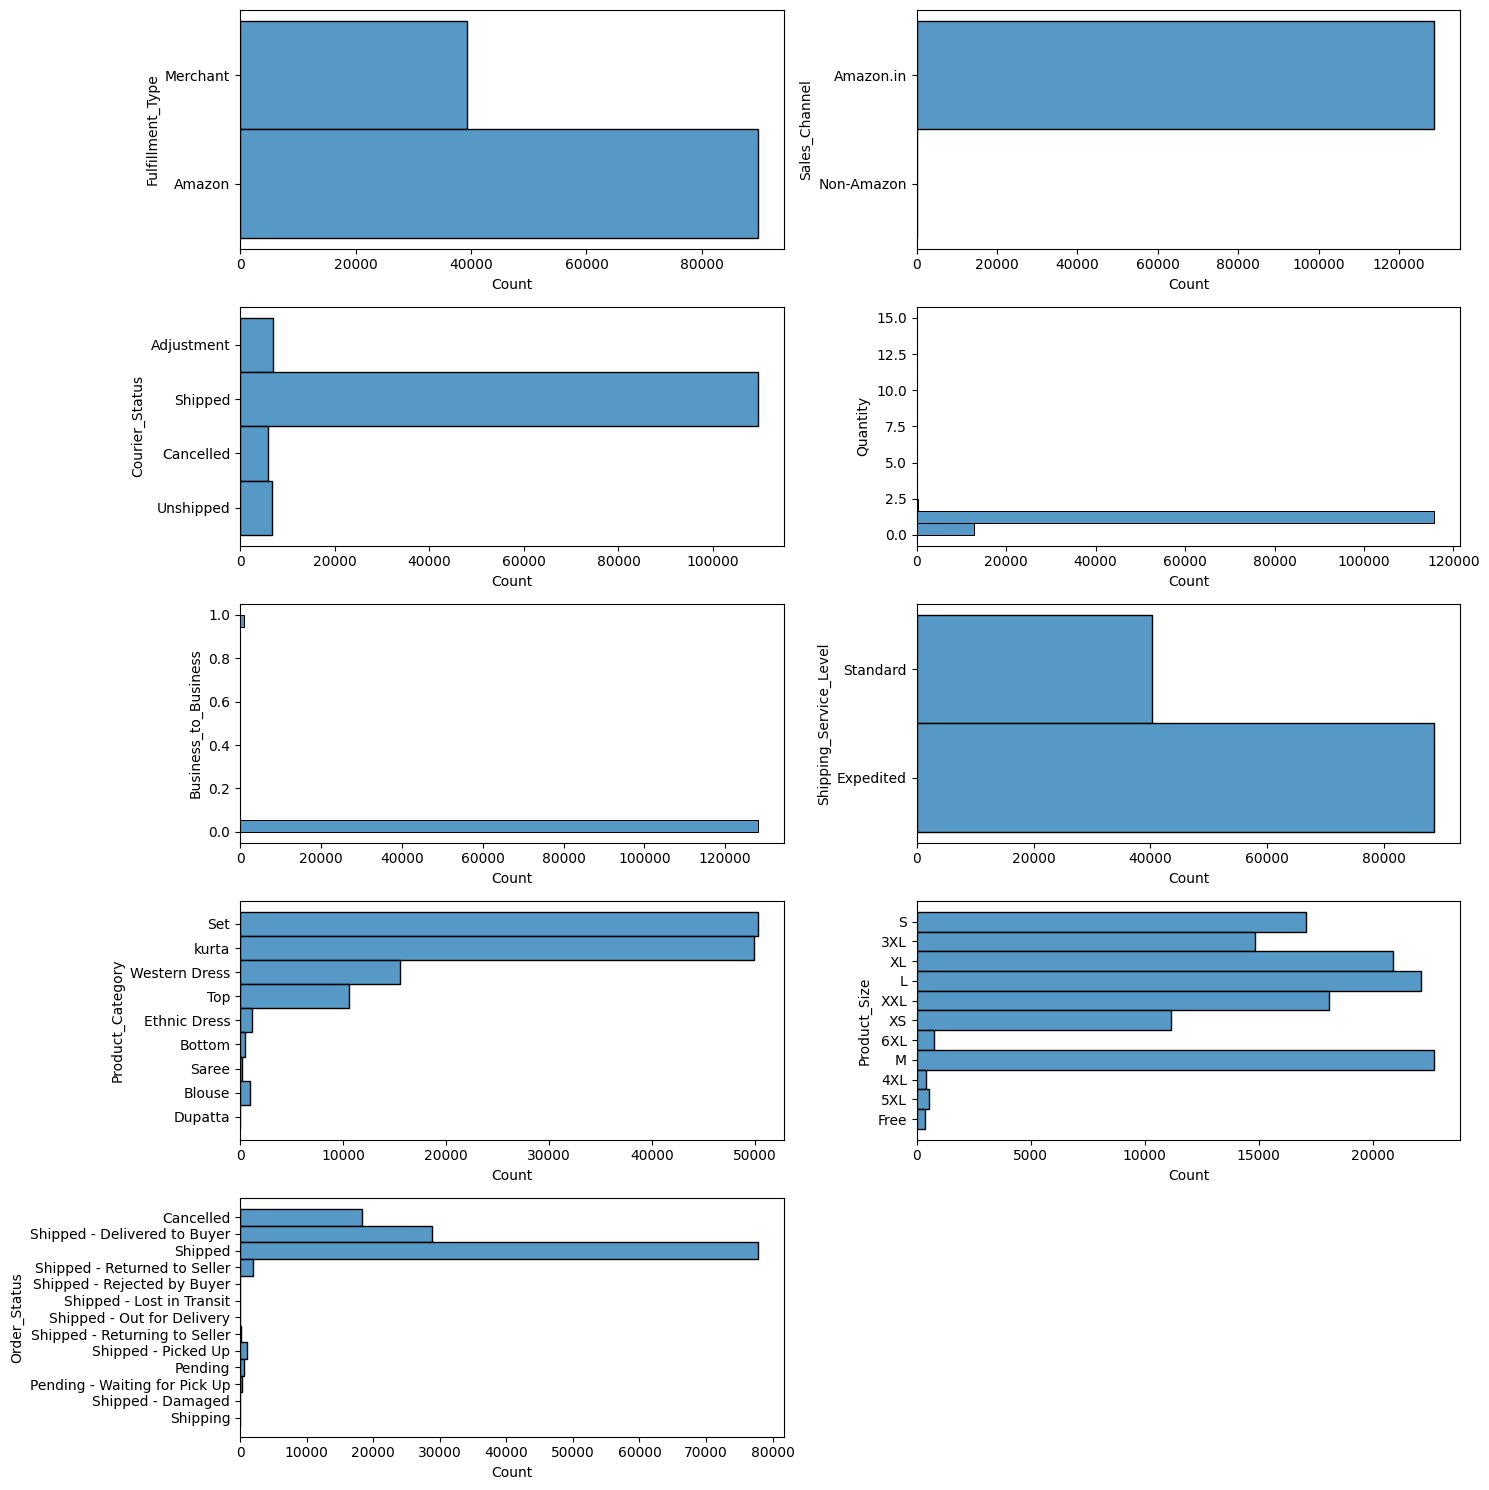

In [49]:
plt.figure(figsize=(15,15))
plotnumber=1

for i in columns1:
  plt.subplot(5,2,plotnumber)
  sns.histplot(y=columns1[i])
  plotnumber=plotnumber+1

plt.tight_layout()

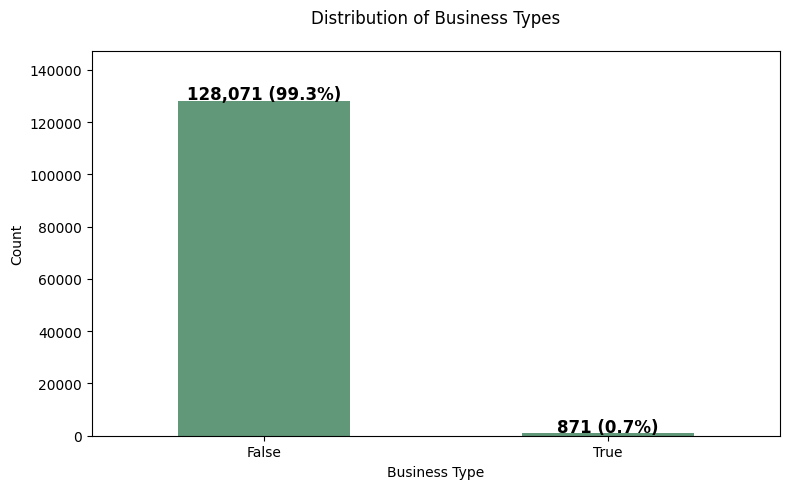

In [50]:
# Count and percentage
value_counts = amazon_df['Business_to_Business'].value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100

# Extracted dominant color (normalized to [0,1] range)
bar_color = (97/255, 152/255, 121/255)

# Plot
plt.figure(figsize=(8, 5))
bars = value_counts.plot(kind='bar', color=bar_color)  # Vertical bars

# Add labels with count and percentage
for i, (count, percent) in enumerate(zip(value_counts, percentages)):
    plt.text(i, count + (total * 0.005), f"{count:,} ({percent:.1f}%)", 
             ha='center', fontsize=12, fontweight='bold')

# Adjust labels and title
plt.xlabel("Business Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Distribution of Business Types", pad=20)  # Move title up using pad
plt.ylim(0, value_counts.max() * 1.15)  # Add space above tallest bar

plt.tight_layout()
plt.show()


**Sales Overview**

Sales Report Overview:
       Stock_Level
count  9188.000000
mean     26.378973
std      58.582786
min       0.000000
25%       3.000000
50%       8.000000
75%      31.000000
max    1234.000000


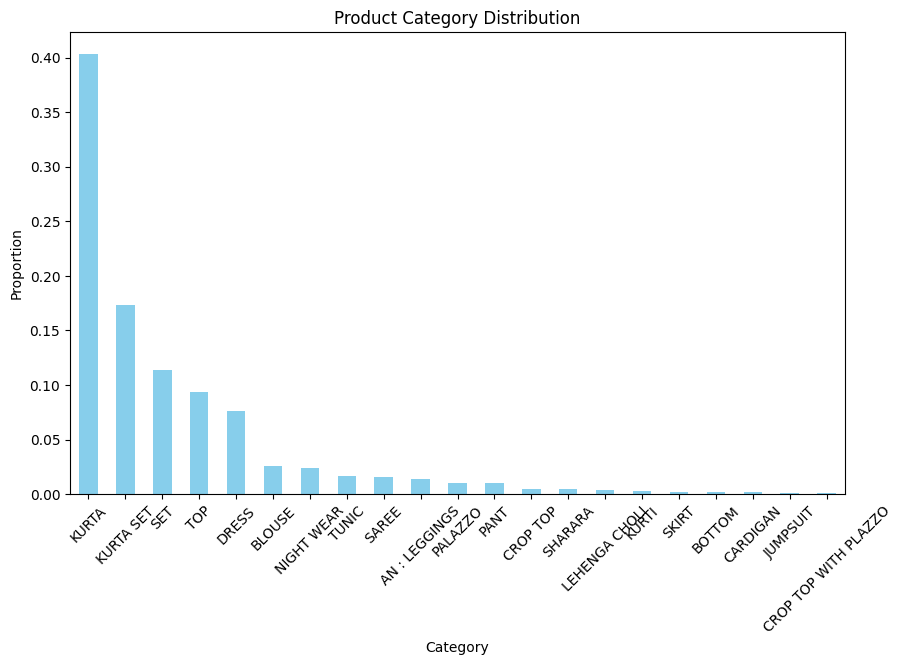


Amazon Sales Overview:
count    128942.000000
mean        609.374814
std         313.357311
min           0.000000
25%         413.000000
50%         583.000000
75%         771.000000
max        5584.000000
Name: Sale_Amount, dtype: float64


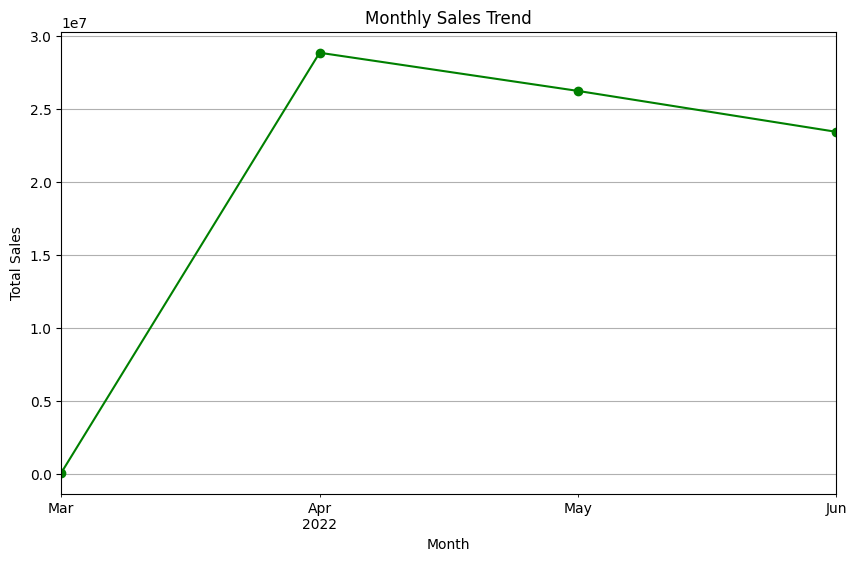


Warehouse Performance Comparison:
       Shiprocket_Price  INCREFF_Price
count          4.000000       4.000000
mean          10.500000       7.662500
std            9.746794       6.890014
min            4.000000       0.150000
25%            5.500000       3.037500
50%            6.500000       7.500000
75%           11.500000      12.125000
max           25.000000      15.500000


In [51]:
# 1. Sales Report Analysis
print("Sales Report Overview:")
print(sales_df.describe())

# Product Category Distribution
category_distribution = sales_df['Product_Category'].value_counts(normalize=True)
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# 2. Amazon Sales Analysis
print("\nAmazon Sales Overview:")
print(amazon_df['Sale_Amount'].describe())

# Monthly Sales Trend
amazon_df['Sale_Date'] = pd.to_datetime(amazon_df['Order_Date'])
monthly_sales = amazon_df.groupby(amazon_df['Sale_Date'].dt.to_period('M'))['Sale_Amount'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# 3. Warehouse Comparison
performance_comparison = pricing_df[['Shiprocket_Price', 'INCREFF_Price']].describe()
print("\nWarehouse Performance Comparison:")
print(performance_comparison)

In [52]:
totalSum = amazon_df.groupby([
                       pd.to_datetime(amazon_df['Order_Date']).dt.month,
                       'Product_Category']).agg({'Sale_Amount': sum})
category_df = totalSum.pivot_table(index='Order_Date', columns='Product_Category', values='Sale_Amount', aggfunc='sum')
category_df

<ipython-input-52-b4c7879221bf>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  'Product_Category']).agg({'Sale_Amount': sum})
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Product_Category,Blouse,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta
Order_Date,,,,,,,,,
3,280.00,NaN,NaN,1099.00,NaN,53884.00,4511.00,7653.28,34256.57
4,195583.21,63308.45,NaN,250666.65,55655.24,15502956.56,1821400.22,2927780.51,8013898.48
5,159794.68,50866.57,NaN,293092.34,41536.62,12640967.35,1995120.16,4381304.41,6657168.62
6,102750.29,36492.96,915.0,246359.67,26741.90,10997368.12,1525780.92,3898599.49,6586215.03


**Correlation Heatmap (Sales vs. Stock Levels) from Merged Data from Amazon Sales Report And Sales Report**

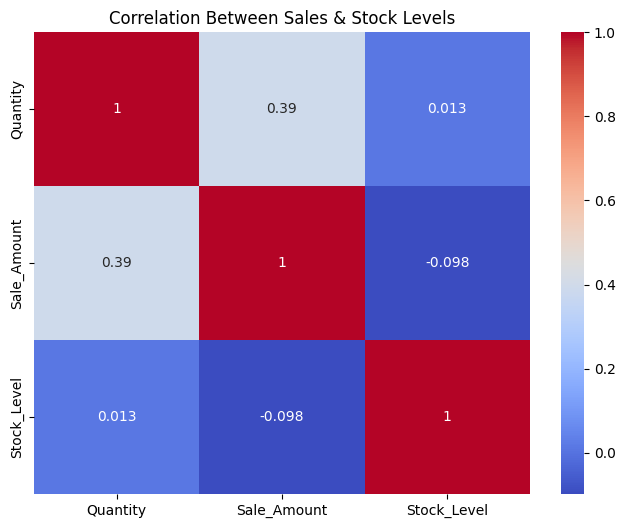

In [53]:
# Merge sales and stock data
merged_sales_stock = pd.merge(
    amazon_df[['Product_SKU', 'Quantity', 'Sale_Amount']],
    sales_df[['Product_SKU', 'Stock_Level']],
    on='Product_SKU',
    how='inner'
)

# Calculate correlation matrix
correlation_matrix = merged_sales_stock[['Quantity', 'Sale_Amount', 'Stock_Level']].corr()

# Visualize with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales & Stock Levels")
plt.show()

# Interpretation:
# - Positive correlation (near 1) = Stock increases with sales
# - Negative correlation (near -1) = Stock decreases with sales


**Price vs. Sales Volume Scatter Plot**

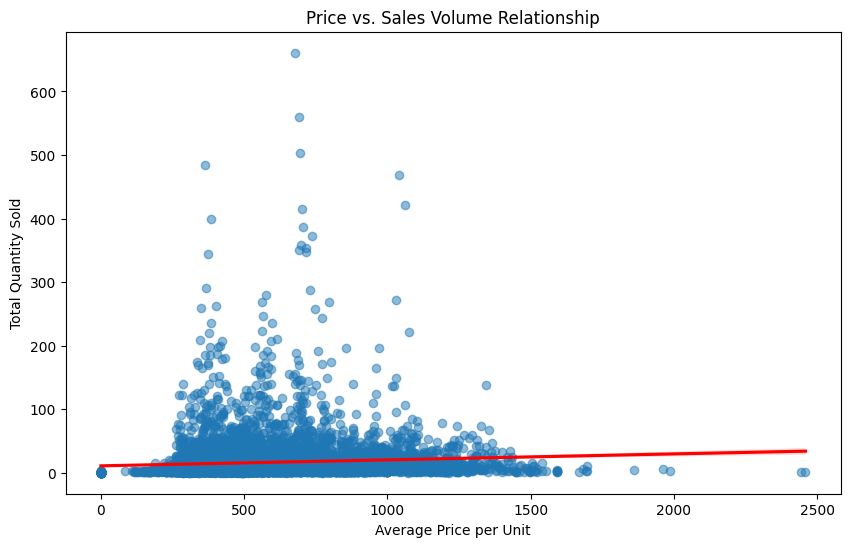

Price Elasticity Coefficient: 0.08 (p-value: 0.0000)


In [54]:
# Get price-quantity relationship
price_quantity = amazon_df.groupby('Product_SKU').agg({
    'Sale_Amount': 'mean',
    'Quantity': 'sum'
}).reset_index()

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(
    x='Sale_Amount', 
    y='Quantity', 
    data=price_quantity,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title("Price vs. Sales Volume Relationship")
plt.xlabel("Average Price per Unit")
plt.ylabel("Total Quantity Sold")
plt.show()

# Calculate price elasticity
from scipy.stats import pearsonr
corr, p_value = pearsonr(price_quantity['Sale_Amount'], price_quantity['Quantity'])
print(f"Price Elasticity Coefficient: {corr:.2f} (p-value: {p_value:.4f})")


In [55]:
#taking postal_data in seperate df for simplification
#amazon_df['Shipping_Postal_Code'] = amazon_df['Shipping_Postal_Code'].fillna(0).astype(int)
#amazon_df['Shipping_Postal_Code'].value_counts()
postal_df = amazon_df['Shipping_Postal_Code']
postal_df

0         400081.0
1         560085.0
2         410210.0
3         605008.0
4         600073.0
            ...   
128970    500013.0
128971    122004.0
128972    500049.0
128973    389350.0
128974    492014.0
Name: Shipping_Postal_Code, Length: 128942, dtype: float64

In [56]:
postal_df = pd.DataFrame(postal_df)
postal_df = postal_df[~postal_df['Shipping_Postal_Code'].astype(str).str[:3].eq('744')]
# removing andaman postalcode as a outlier 
postal_df = postal_df[~postal_df['Shipping_Postal_Code'].astype(str).str[:3].eq('682')]
# removing  Lakshadweep postalcode as a outlier 

postal_df

,Shipping_Postal_Code
0,400081.0
1,560085.0
2,410210.0
3,605008.0
4,600073.0
...,...
128970,500013.0
128971,122004.0
128972,500049.0
128973,389350.0


**Created a postal dataframe for Map Analysis**

In [57]:
postal_df = postal_df.drop_duplicates(subset=['Shipping_Postal_Code'])
postal_df

,Shipping_Postal_Code
0,400081.0
1,560085.0
2,410210.0
3,605008.0
4,600073.0
...,...
128384,521322.0
128527,827302.0
128542,609603.0
128557,851205.0


In [58]:
pip install pgeocode

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pgeocode
#initialize pgeocode with country for India
geocode = pgeocode.Nominatim('IN')

In [60]:
def get_coordinates(postal_code):
    try:
        # Convert to string and remove .0 if it's a float
        postal_code = str(int(postal_code)) if isinstance(postal_code, float) else str(postal_code)
        results = geocode.query_postal_code(postal_code)
        return (results.latitude, results.longitude)
    except Exception as e:
        print(f"Error for postal code {postal_code}: {e}")
        return (None, None)

# Apply the function
coordinates = postal_df['Shipping_Postal_Code'].apply(get_coordinates)

# Split into separate columns
postal_df['Latitude'] = coordinates.apply(lambda x: x[0])
postal_df['Longitude'] = coordinates.apply(lambda x: x[1])

<ipython-input-60-ff6f4b72fecd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postal_df['Latitude'] = coordinates.apply(lambda x: x[0])
<ipython-input-60-ff6f4b72fecd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postal_df['Longitude'] = coordinates.apply(lambda x: x[1])


In [61]:
postal_df

,Shipping_Postal_Code,Latitude,Longitude
0,400081.0,18.980800,72.833800
1,560085.0,13.225700,77.575000
2,410210.0,19.049800,73.070200
3,605008.0,11.876800,79.810700
4,600073.0,12.844667,80.095767
...,...,...,...
128384,521322.0,16.380400,80.978300
128527,827302.0,23.603517,85.974542
128542,609603.0,10.974200,79.758500
128557,851205.0,25.515856,86.579889


In [62]:
from shapely.geometry import Point
import geopandas as gpd
#create point geometry
geometry = [Point(xy) for xy in zip(postal_df['Longitude'], postal_df['Latitude'])]

#convert to GeoDataframe
gdf = gpd.GeoDataFrame(postal_df , geometry = geometry)
gdf = gdf.set_crs(epsg = 4326)

In [63]:
set_df = amazon_df[amazon_df.Product_Category == 'Set']
kurta_df = amazon_df[amazon_df.Product_Category == 'kurta']
Western_Dress_df = amazon_df[amazon_df.Product_Category == 'Western Dress']
Top_df = amazon_df[amazon_df.Product_Category == 'Top']
Ethnic_Dress_df = amazon_df[amazon_df.Product_Category == 'Ethnic Dress']
Bottom_df = amazon_df[amazon_df.Product_Category == 'Bottom']
Saree_df = amazon_df[amazon_df.Product_Category == 'Saree']
Blouse_df = amazon_df[amazon_df.Product_Category == 'Blouse']
Dupatta_df = amazon_df[amazon_df.Product_Category == 'Dupatta']

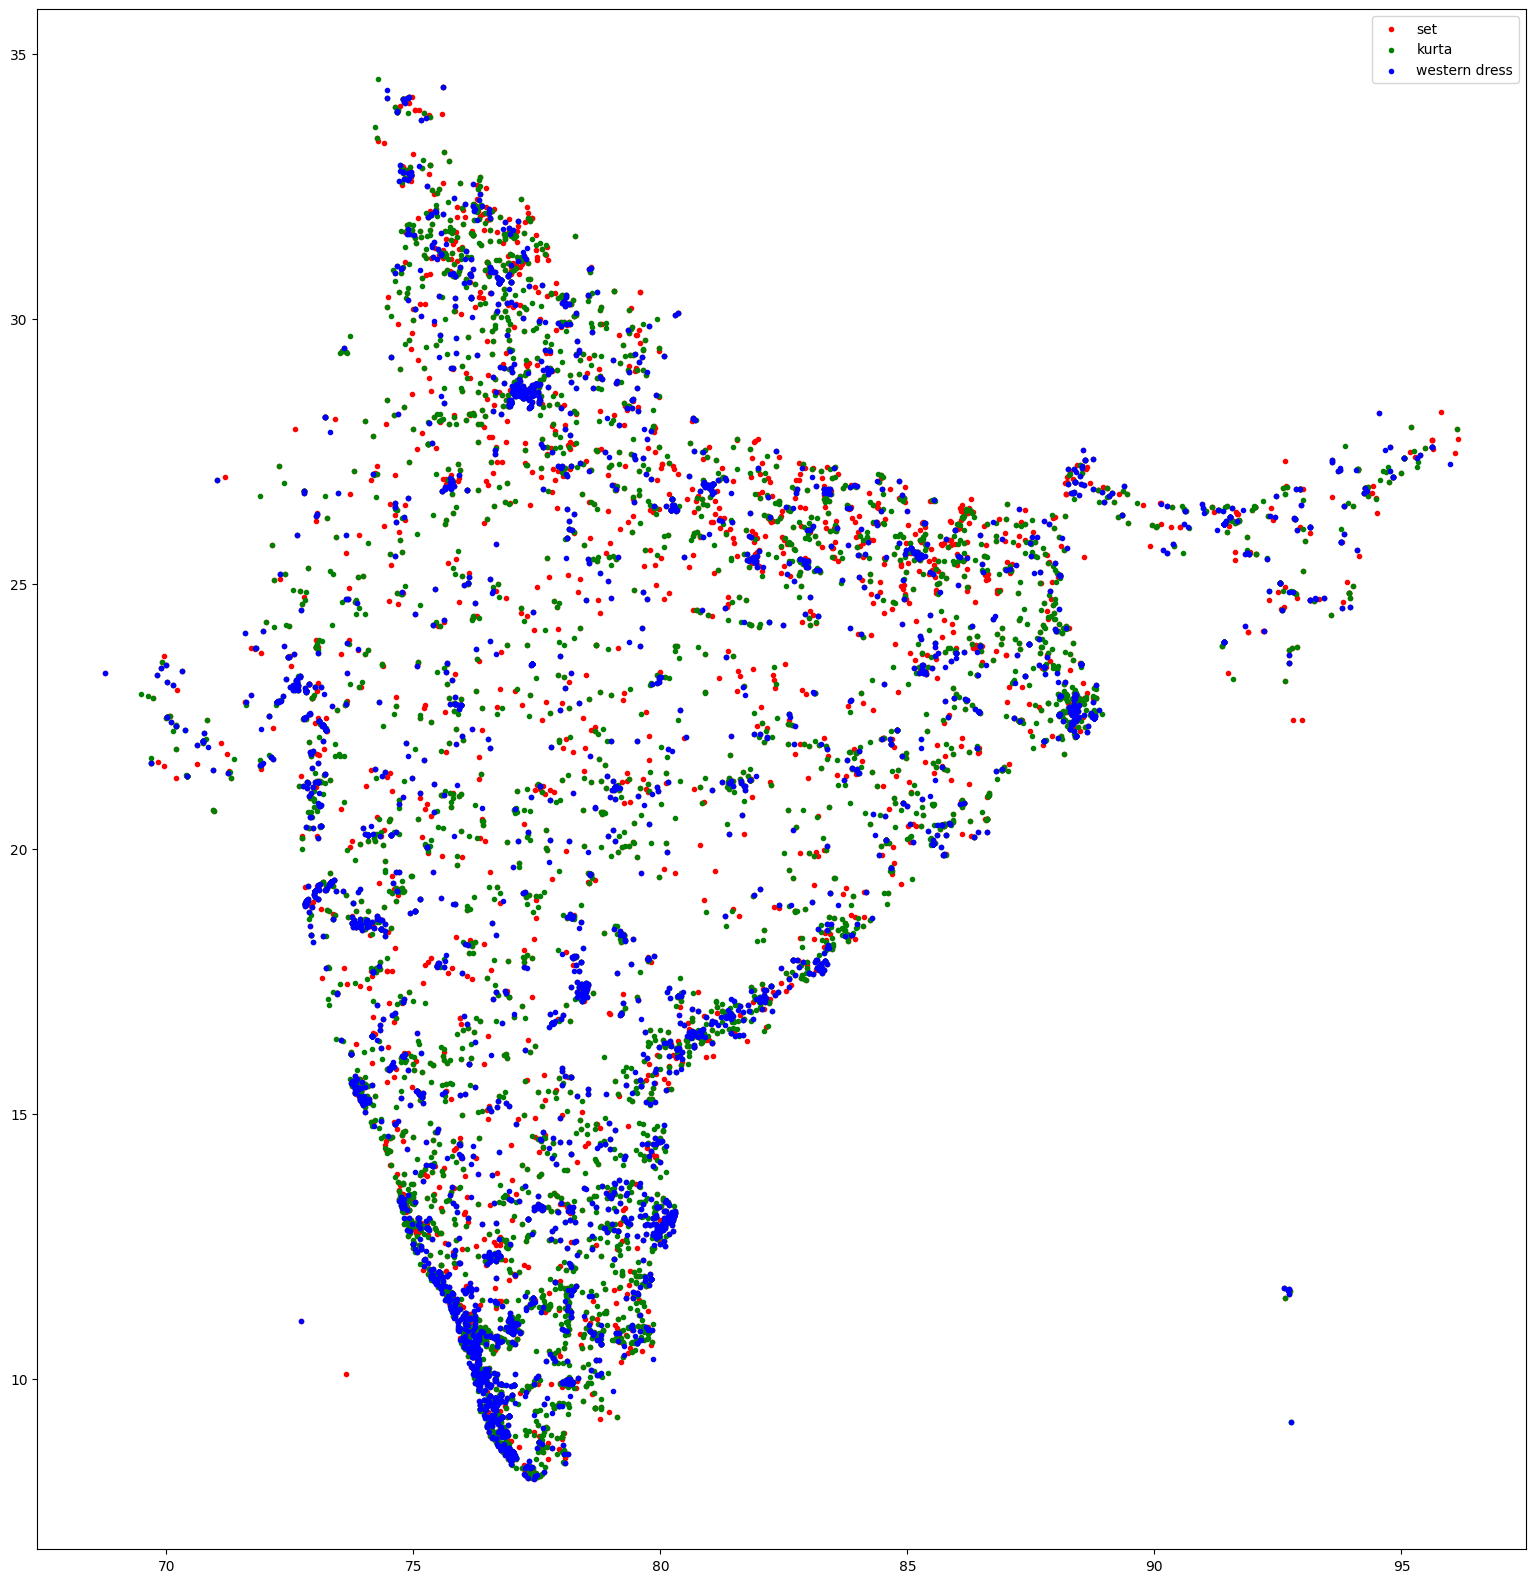

In [64]:
def get_coordinates(postal_code):
    try:
        postal_code = str(int(postal_code)) if isinstance(postal_code, float) else str(postal_code)
        results = geocode.query_postal_code(postal_code)
        return pd.Series({'Latitude': results.latitude, 'Longitude': results.longitude})
    except Exception as e:
        print(f"Error for postal code {postal_code}: {e}")
        return pd.Series({'Latitude': None, 'Longitude': None})

# For each DataFrame, use this approach:
def process_dataframe(df):
    # Drop duplicates
    df = df.drop_duplicates(subset=['Shipping_Postal_Code'])
    
    # Get coordinates
    coordinates = df['Shipping_Postal_Code'].apply(get_coordinates)
    
    # Assign coordinates
    df = df.assign(
        Latitude=coordinates['Latitude'],
        Longitude=coordinates['Longitude']
    )
    
    # Create geometry
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
    
    # Convert to GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    gdf = gdf.set_crs(epsg=4326)
    
    return gdf

# Process each DataFrame
gdf_set = process_dataframe(set_df.copy())
gdf_kurta = process_dataframe(kurta_df.copy())
gdf_Dupatta = process_dataframe(Dupatta_df.copy())
gdf_Western_Dress = process_dataframe(Western_Dress_df.copy())
gdf_Saree = process_dataframe(Saree_df.copy())

# Plotting
fig, ax = plt.subplots(figsize=(20,20))
gdf_set.plot(ax=ax, marker='.', color='red', label="set")
gdf_kurta.plot(ax=ax, marker='.', color='green', label="kurta")
gdf_Western_Dress.plot(ax=ax, marker='.', color='blue', label="western dress")
ax.legend()
plt.show()

**Analysis of P&L March 2021**
Objective: Compare pricing strategies across platforms (Amazon, Flipkart, Myntra).

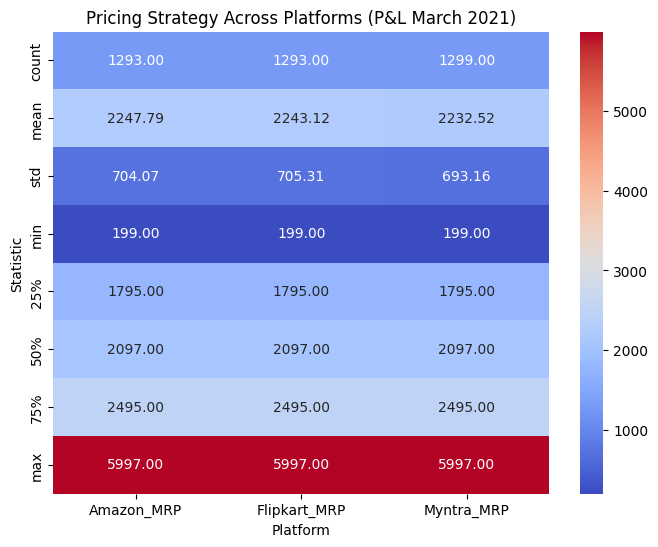

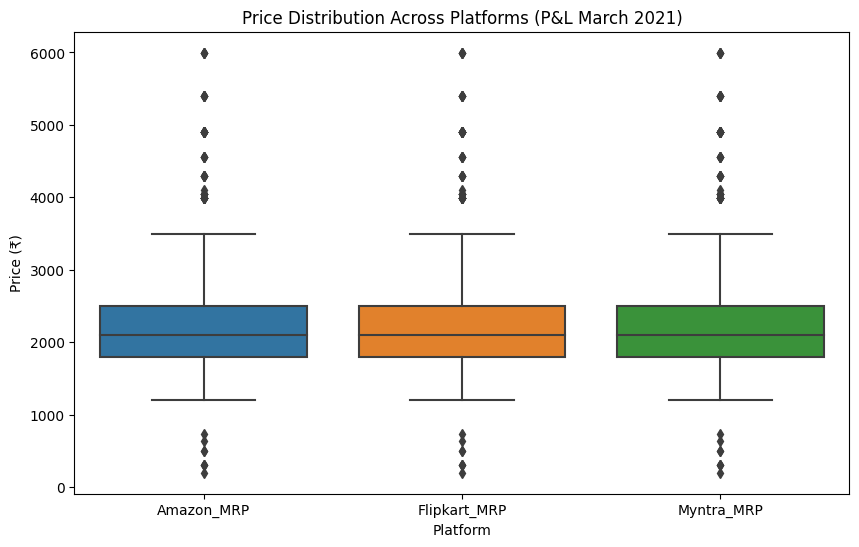

In [65]:
# Select relevant columns for analysis
platforms = ['Amazon_MRP', 'Flipkart_MRP', 'Myntra_MRP']
pricing_data = pnl_df[platforms]

# Ensure the selected columns are numeric
pricing_data = pricing_data.apply(pd.to_numeric, errors='coerce')

# Generate descriptive statistics for numeric columns only
pricing_stats = pricing_data.describe()

# Create a heatmap for pricing comparison
plt.figure(figsize=(8, 6))
sns.heatmap(pricing_stats, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pricing Strategy Across Platforms (P&L March 2021)')
plt.ylabel('Statistic')
plt.xlabel('Platform')
plt.show()

# Box plot to visualize price distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=pricing_data)
plt.title('Price Distribution Across Platforms (P&L March 2021)')
plt.ylabel('Price (₹)')
plt.xlabel('Platform')
plt.show()


**Analysis of May 2022**
Objective: Compare pricing strategies across platforms (Amazon, Flipkart, Myntra).

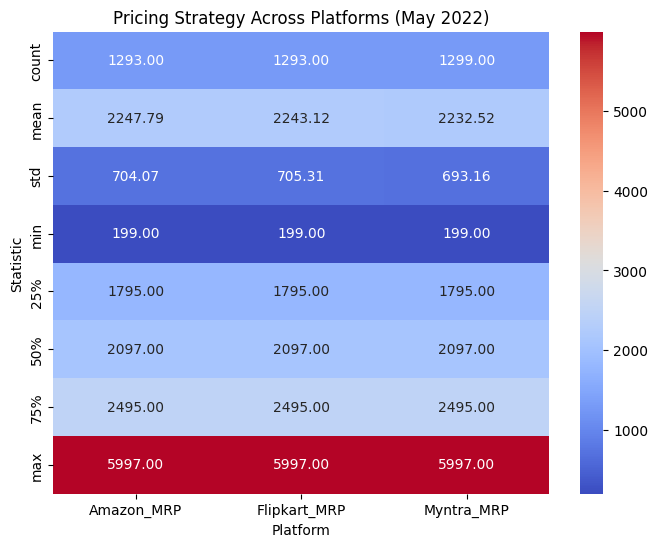

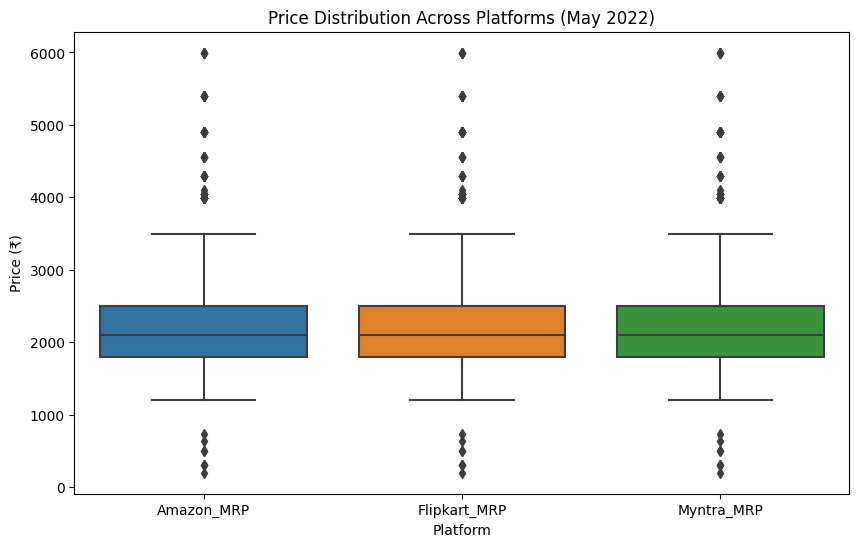

In [66]:
# Select relevant columns for analysis
platforms = ['Amazon_MRP', 'Flipkart_MRP', 'Myntra_MRP']
pricing_data_may = may2022_df[platforms]

# Ensure the selected columns are numeric
pricing_data_may = pricing_data_may.apply(pd.to_numeric, errors='coerce')

# Generate descriptive statistics for numeric columns only
pricing_stats_may = pricing_data_may.describe()

# Create a heatmap for pricing comparison
plt.figure(figsize=(8, 6))
sns.heatmap(pricing_stats_may, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pricing Strategy Across Platforms (May 2022)')
plt.ylabel('Statistic')
plt.xlabel('Platform')
plt.show()

# Box plot to visualize price distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=pricing_data_may)
plt.title('Price Distribution Across Platforms (May 2022)')
plt.ylabel('Price (₹)')
plt.xlabel('Platform')
plt.show()


**Analysis of Amazon Sales Report by Region: States and Cities**


State-Level Sales (Histogram)

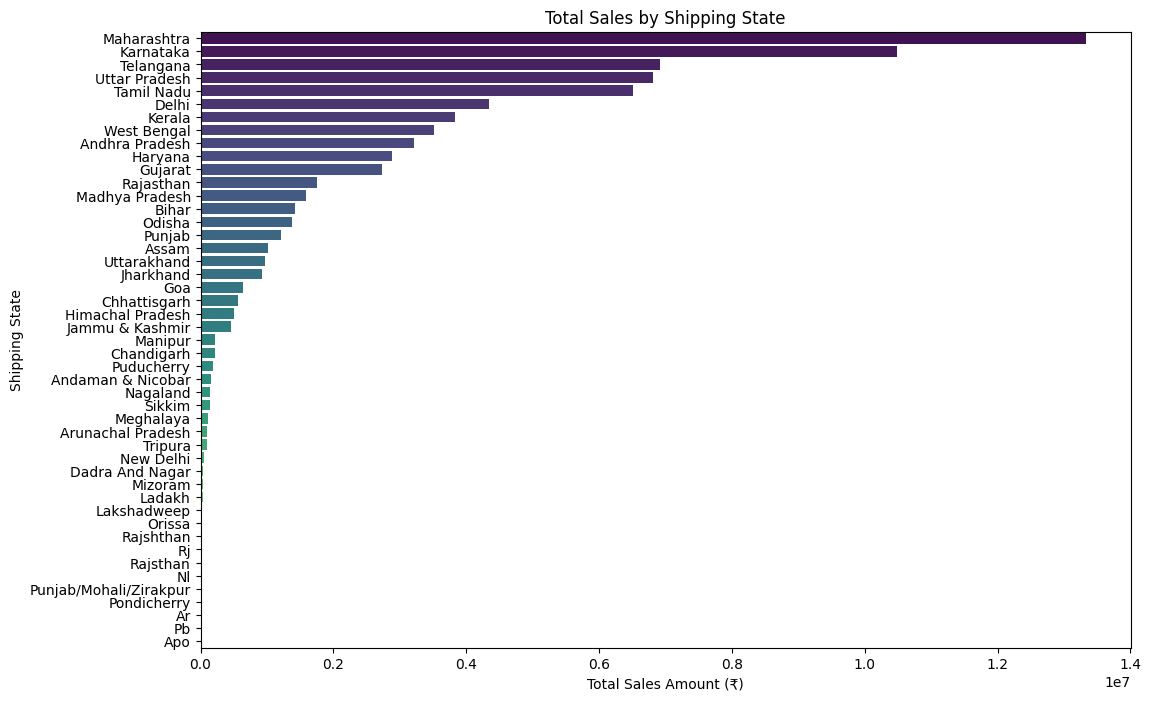

In [67]:
# Group by state and calculate total sales
state_sales = amazon_df.groupby('Shipping_State')['Sale_Amount'].sum().reset_index()

# Sort states by total sales
state_sales.sort_values(by='Sale_Amount', ascending=False, inplace=True)

# Visualize total sales by state with rotated labels to prevent overlap
plt.figure(figsize=(12, 8))
sns.barplot(x='Sale_Amount', y='Shipping_State', data=state_sales, palette='viridis')
plt.title('Total Sales by Shipping State')
plt.xlabel('Total Sales Amount (₹)')
plt.ylabel('Shipping State')
plt.show()


City-Level Sales (Top 10 Cities)

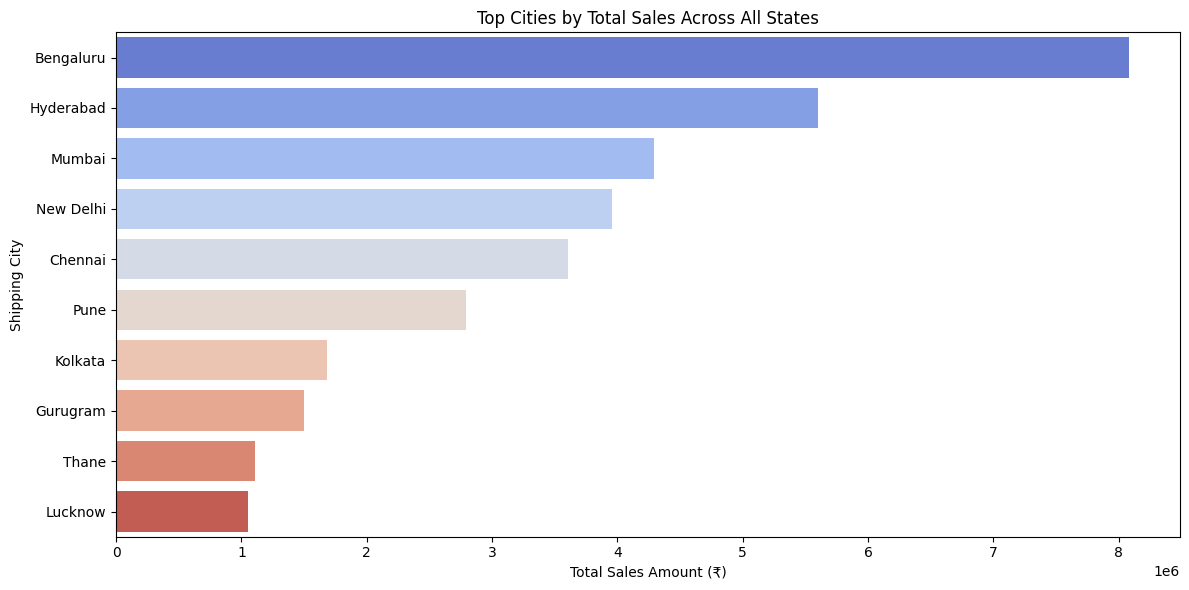

In [68]:
# Group by city to calculate total sales
city_sales = amazon_df.groupby('Shipping_City')['Sale_Amount'].sum().reset_index()

# Sort cities by total sales and select the top 10 cities
top_cities_sales = city_sales.sort_values(by='Sale_Amount', ascending=False).head(10)

# Visualize total sales by city (Top 10 cities)
plt.figure(figsize=(12, 6))
sns.barplot(x='Sale_Amount', y='Shipping_City', data=top_cities_sales, palette='coolwarm')
plt.title('Top Cities by Total Sales Across All States')
plt.xlabel('Total Sales Amount (₹)')
plt.ylabel('Shipping City')
plt.tight_layout()
plt.show()


**Business Insights**

In [69]:
# Basic statistics of 'Order_Status' and 'Courier_Status' together
print("Basic Statistics of Order_Status and Courier_Status:")
print(amazon_df.groupby(['Order_Status', 'Courier_Status']).size().unstack(fill_value=0))


Basic Statistics of Order_Status and Courier_Status:
Courier_Status                 Adjustment  Cancelled  Shipped  Unshipped
Order_Status                                                            
Cancelled                            6858       5838        0       5629
Pending                                 0          2       10        646
Pending - Waiting for Pick Up           0          0        0        281
Shipped                                 0         93    77580        115
Shipped - Damaged                       0          0        1          0
Shipped - Delivered to Buyer            8          0    28754          0
Shipped - Lost in Transit               0          0        5          0
Shipped - Out for Delivery              0          0       35          0
Shipped - Picked Up                     0          0      973          0
Shipped - Rejected by Buyer             0          0       11          0
Shipped - Returned to Seller            3          0     1947          

Promotion Analysis

In [70]:
# If Promotion_IDs has a values, then a new column 'Promotion' should be created with value 'Yes', else 'No'
amazon_df['Promotion'] = amazon_df['Promotion_IDs'].apply(lambda x: 'Yes' if pd.notna(x) else 'No')
# Drop 'Promotion_IDs' column
amazon_df = amazon_df.drop('Promotion_IDs', axis=1)

# Take a basic statistics of the Merchant and Promotion
print("Basic Statistics of Merchant and Promotion:")
print(amazon_df.groupby('Fulfillment_Type')['Promotion'].value_counts())

Basic Statistics of Merchant and Promotion:
Fulfillment_Type  Promotion
Amazon            Yes          47459
                  No           42219
Merchant          Yes          32338
                  No            6926
Name: count, dtype: int64


**Cancellation Insights**

In [71]:
# Count where 'Order Status' is 'Cancelled' or 'Shipped - Rejected by Buyer' or 'Shipped - Returned to Seller' or 'Shipped - Returning to Seller' if 'Promotion' is 'Yes'
cancelled_promotion = amazon_df[(amazon_df['Order_Status'].isin(['Cancelled', 'Shipped - Rejected by Buyer', 'Shipped - Returned to Seller', 'Shipped - Returning to Seller'])) & (amazon_df['Promotion'] == 'Yes')]
print("Count of Cancelled/Returning Orders where Promotion is given:")
print(cancelled_promotion.shape[0])
# Proportion of 'Cancelled' or 'Shipped - Rejected by Buyer' or 'Shipped - Returned to Seller' or 'Shipped - Returning to Seller' if 'Promotion' is 'Yes'
proportion_cancelled_promotion = cancelled_promotion.shape[0] / amazon_df[amazon_df['Promotion'] == 'Yes'].shape[0]
print("Proportion of Cancelled/Returning Orders where Promotion is given(in Percentage):")
print(proportion_cancelled_promotion * 100)

# Count where 'Order Status' is 'Cancelled' or 'Shipped - Rejected by Buyer' or 'Shipped - Returned to Seller' or 'Shipped - Returning to Seller' if 'Promotion' is 'No'
not_cancelled_promotion = amazon_df[(amazon_df['Order_Status'].isin(['Cancelled', 'Shipped - Rejected by Buyer', 'Shipped - Returned to Seller', 'Shipped - Returning to Seller'])) & (amazon_df['Promotion'] == 'No')]
print("Count of Cancelled where no Promotion is given:")
print(not_cancelled_promotion.shape[0])
# Proportion of 'Cancelled' or 'Shipped - Rejected by Buyer' or 'Shipped - Returned to Seller' or 'Shipped - Returning to Seller' if 'Promotion' is 'No'
proportion_not_cancelled_promotion = not_cancelled_promotion.shape[0] / amazon_df[amazon_df['Promotion'] == 'No'].shape[0]
print("Proportion of Cancelled/Returning Orders where no Promotion is given(in Percentage):")
print(proportion_not_cancelled_promotion * 100)

Count of Cancelled/Returning Orders where Promotion is given:
2396
Proportion of Cancelled/Returning Orders where Promotion is given(in Percentage):
3.002619146083186
Count of Cancelled where no Promotion is given:
18035
Proportion of Cancelled/Returning Orders where no Promotion is given(in Percentage):
36.697527724081795


In [72]:
# Count where 'Order Status' is 'Cancelled' or 'Shipped - Rejected by Buyer' or 'Shipped - Returned to Seller' or 'Shipped - Returning to Seller' by 'Fulfillment_Type'
cancelled_fulfillment = amazon_df[(amazon_df['Order_Status'].isin(['Cancelled', 'Shipped - Rejected by Buyer', 'Shipped - Returned to Seller', 'Shipped - Returning to Seller']))]
print("Count of Cancelled/Returning Orders by Fulfillment Type:")
print(cancelled_fulfillment.groupby('Fulfillment_Type').size())
# Proportion of 'Cancelled' or 'Shipped - Rejected by Buyer' or 'Shipped - Returned to Seller' or 'Shipped - Returning to Seller' by 'Fulfillment_Type'
proportion_cancelled_fulfillment = cancelled_fulfillment.groupby('Fulfillment_Type').size() / amazon_df.groupby('Fulfillment_Type').size()
print("Proportion of Cancelled/Returning Orders by Fulfillment Type(in Percentage):")
print(proportion_cancelled_fulfillment * 100)

Count of Cancelled/Returning Orders by Fulfillment Type:
Fulfillment_Type
Amazon      11467
Merchant     8964
dtype: int64
Proportion of Cancelled/Returning Orders by Fulfillment Type(in Percentage):
Fulfillment_Type
Amazon      12.786860
Merchant    22.830073
dtype: float64


In [73]:
amazon_df['Product_Price'] = amazon_df.apply(lambda x: x['Sale_Amount'] / x['Quantity'] if x['Quantity'] != 0 and pd.notna(x['Sale_Amount']) else None, axis=1)

# Describe the "Product_Price" column
print("Product Price Description:") 
print(amazon_df['Product_Price'].describe())

# Count the None values in "Product_Price"
print("Count of None values in Product Price:")
print(amazon_df['Product_Price'].isna().sum())

# Count the number of rows where "Product_Price" is not None
print("Count of rows where Product Price is not None:")
print(amazon_df['Product_Price'].notna().sum())


mean_product_price = amazon_df[amazon_df['Product_Price'].notna()].groupby('Product_SKU')['Product_Price'].mean().reset_index()
mean_product_price = mean_product_price.rename(columns={'Product_Price': 'Mean_Product_Price'})
amazon_df = amazon_df.merge(mean_product_price, on='Product_SKU', how='left')
amazon_df['Product_Price'] = amazon_df.apply(lambda x: x['Mean_Product_Price'] if pd.isna(x['Product_Price']) else x['Product_Price'], axis=1)
amazon_df = amazon_df.drop('Mean_Product_Price', axis=1)


print("Updated Product Price Description:")
print(amazon_df['Product_Price'].describe())
# Count the number of rows where "Product_Price" is not None after filling
print("Count of rows where Product Price is not None after filling:")
print(amazon_df['Product_Price'].notna().sum())
# Count the number of rows where "Product_Price" is None after filling
print("Count of rows where Product Price is None after filling:")
print(amazon_df['Product_Price'].isna().sum())

# Sale_Amount is Product_Price * Quantity. 
# Fill the na values in Sale_Amount with Product_Price * Quantity where Quantity is not 0, if quantity is 0, then Sale_Amount should be Product_Price
amazon_df['Sale_Amount'] = amazon_df.apply(lambda x: x['Product_Price'] * x['Quantity'] if x['Quantity'] != 0 else x['Product_Price'], axis=1)
# Describe the Sale_Amount column
print("Sale Amount Description:")
print(amazon_df['Sale_Amount'].describe())
# Count the number of rows where "Sale_Amount" is not None
print("Count of rows where Sale Amount is not None:")
print(amazon_df['Sale_Amount'].notna().sum())
# Count the number of rows where "Sale_Amount" is None
print("Count of rows where Sale Amount is None:")
print(amazon_df['Sale_Amount'].isna().sum())


Product Price Description:
count    116140.000000
mean        646.831376
std         279.186842
min           0.000000
25%         449.000000
50%         599.000000
75%         788.000000
max        2598.000000
Name: Product_Price, dtype: float64
Count of None values in Product Price:
12802
Count of rows where Product Price is not None:
116140
Updated Product Price Description:
count    128882.000000
mean        646.808364
std         277.274124
min           0.000000
25%         444.272727
50%         603.000000
75%         788.000000
max        2598.000000
Name: Product_Price, dtype: float64
Count of rows where Product Price is not None after filling:
128882
Count of rows where Product Price is None after filling:
60
Sale Amount Description:
count    128882.000000
mean        648.841068
std         281.003934
min           0.000000
25%         446.000000
50%         605.424242
75%         788.000000
max        5584.000000
Name: Sale_Amount, dtype: float64
Count of rows where Sale Amo

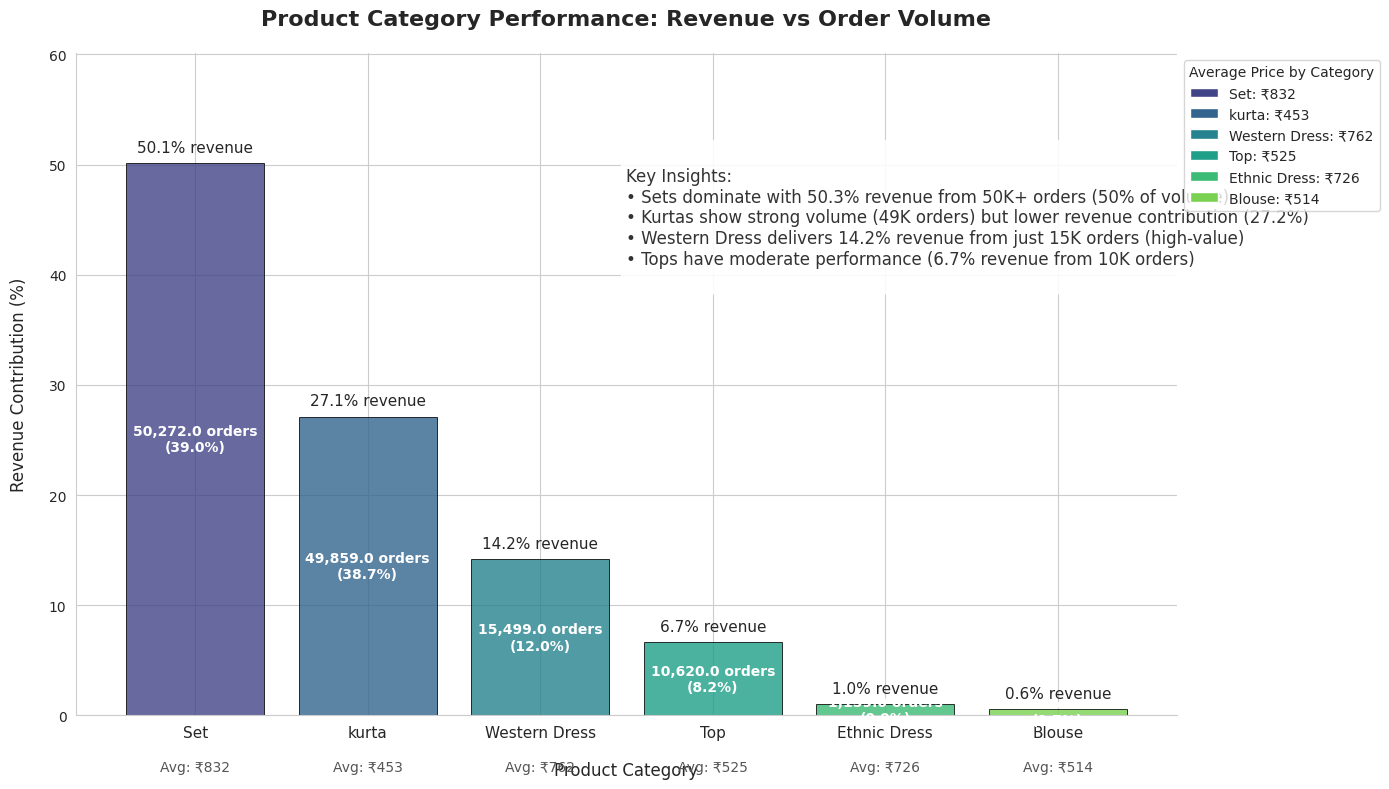

In [74]:
# Prepare the data
category_stats = amazon_df.groupby('Product_Category').agg(
    Total_Revenue=('Sale_Amount', 'sum'),
    Order_Count=('Order_ID', 'count'),
    Avg_Price=('Product_Price', 'mean')
).sort_values('Total_Revenue', ascending=False)

# Calculate percentages
category_stats['Revenue_Pct'] = (category_stats['Total_Revenue'] / category_stats['Total_Revenue'].sum()) * 100
category_stats['Order_Pct'] = (category_stats['Order_Count'] / category_stats['Order_Count'].sum()) * 100

# Select top categories
top_categories = category_stats.head(6).copy()
top_categories.to_csv('amazon_category_performance.csv')
# Create the visualization
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a color gradient based on average price
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_categories)))

# Bar plot for Revenue Percentage
bars = plt.bar(top_categories.index, 
               top_categories['Revenue_Pct'], 
               color=colors,
               edgecolor='black',
               linewidth=0.7,
               alpha=0.8)

# Add order count labels inside bars
for i, (category, row) in enumerate(top_categories.iterrows()):
    plt.text(i, row['Revenue_Pct']/2, 
             f"{row['Order_Count']:,} orders\n({row['Order_Pct']:.1f}%)",
             ha='center',
             va='center',
             color='white',
             fontweight='bold',
             fontsize=10)

# Add revenue percentage labels above bars
for i, (category, row) in enumerate(top_categories.iterrows()):
    plt.text(i, row['Revenue_Pct'] + 1, 
             f"{row['Revenue_Pct']:.1f}% revenue",
             ha='center',
             fontsize=11)

# Add average price annotations
for i, (category, row) in enumerate(top_categories.iterrows()):
    plt.text(i, -5, 
             f"Avg: ₹{row['Avg_Price']:,.0f}",
             ha='center',
             fontsize=10,
             color='#555555')

# Strategic Insights Annotations
insight_text = """
Key Insights:
• Sets dominate with 50.3% revenue from 50K+ orders (50% of volume)
• Kurtas show strong volume (49K orders) but lower revenue contribution (27.2%)
• Western Dress delivers 14.2% revenue from just 15K orders (high-value)
• Tops have moderate performance (6.7% revenue from 10K orders)
"""

plt.annotate(insight_text,
             xy=(0.5, 0.65),
             xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
             fontsize=12,
             color='#333333')

# Formatting
plt.title('Product Category Performance: Revenue vs Order Volume', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Product Category', labelpad=15, fontsize=12)
plt.ylabel('Revenue Contribution (%)', labelpad=15, fontsize=12)
plt.ylim(0, top_categories['Revenue_Pct'].max() * 1.2)
plt.xticks(fontsize=11)

# Remove spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend for average price
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], 
                         label=f"{cat}: ₹{top_categories.loc[cat]['Avg_Price']:,.0f}") 
                   for i, cat in enumerate(top_categories.index)]
plt.legend(handles=legend_elements, 
           title='Average Price by Category',
           bbox_to_anchor=(1, 1),
           loc='upper left')

plt.tight_layout()
plt.savefig('category_performance_insights.png', dpi=300, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


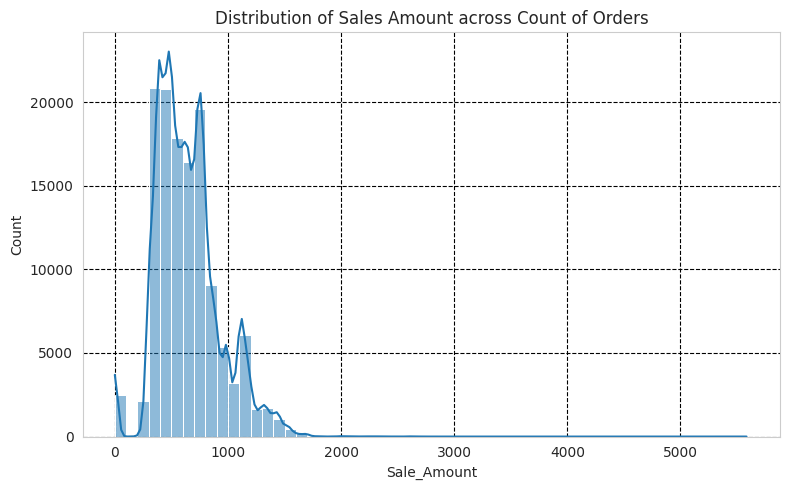

In [75]:
fig, my_ax = plt.subplots(figsize=(8,5))
sns.histplot(data = amazon_df['Sale_Amount'], ax=my_ax, binwidth=100, kde=True)
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Count of Orders")
plt.tight_layout()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

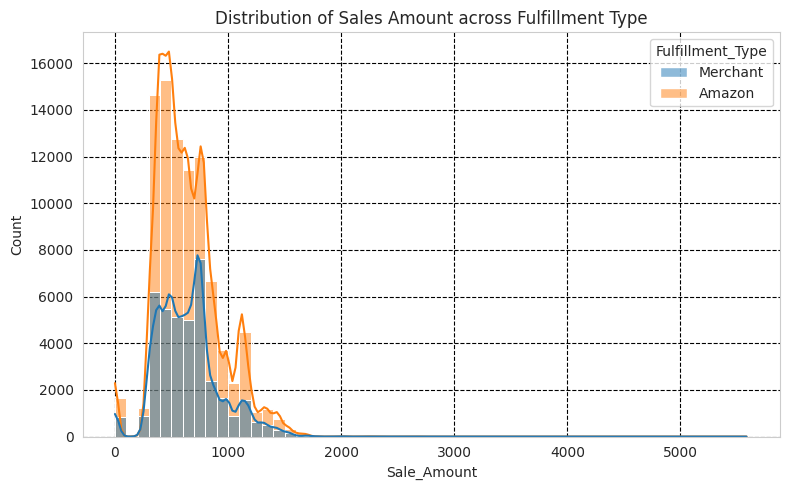

In [76]:
# Sale Amount by Fulfillment Type
fig, my_ax = plt.subplots(figsize=(8,5))
sns.histplot(data = amazon_df, x='Sale_Amount', ax=my_ax, binwidth=100, kde=True, hue='Fulfillment_Type')
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Fulfillment Type")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

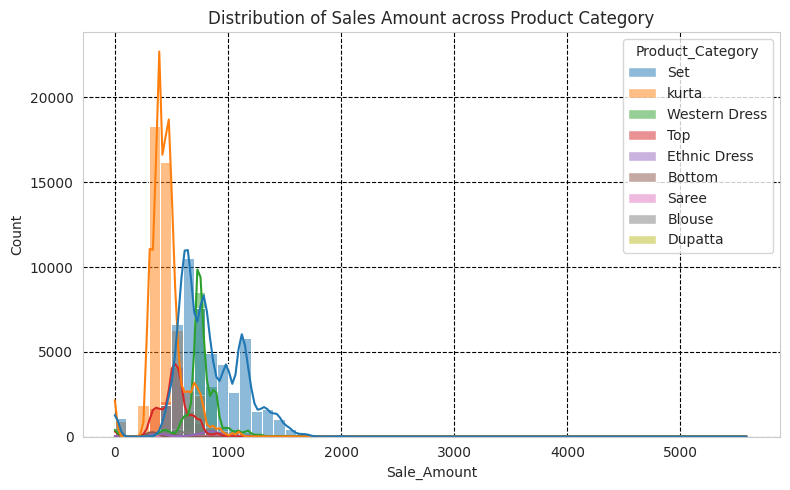

In [77]:
# Sale Amount by Product Category
fig, my_ax = plt.subplots(figsize=(8,5))
sns.histplot(data = amazon_df, x='Sale_Amount', ax=my_ax, binwidth=100, kde=True, hue='Product_Category')
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Product Category")
plt.tight_layout()



**During which season or time period should we concentrate more on the best performing category in the Amazon Sale Report, and what are the reasons for this focus?** The "Set" category demonstrates the highest performance, peaking in April. To capitalize on this trend, it is advisable to launch marketing campaigns targeting this category in March. Although performance starts to decline from May onwards, it remains relatively stable over several months. Therefore, maintaining marketing efforts for the "Set" category throughout the year could be beneficial.


**Product Category Set Sales Amount Trend**

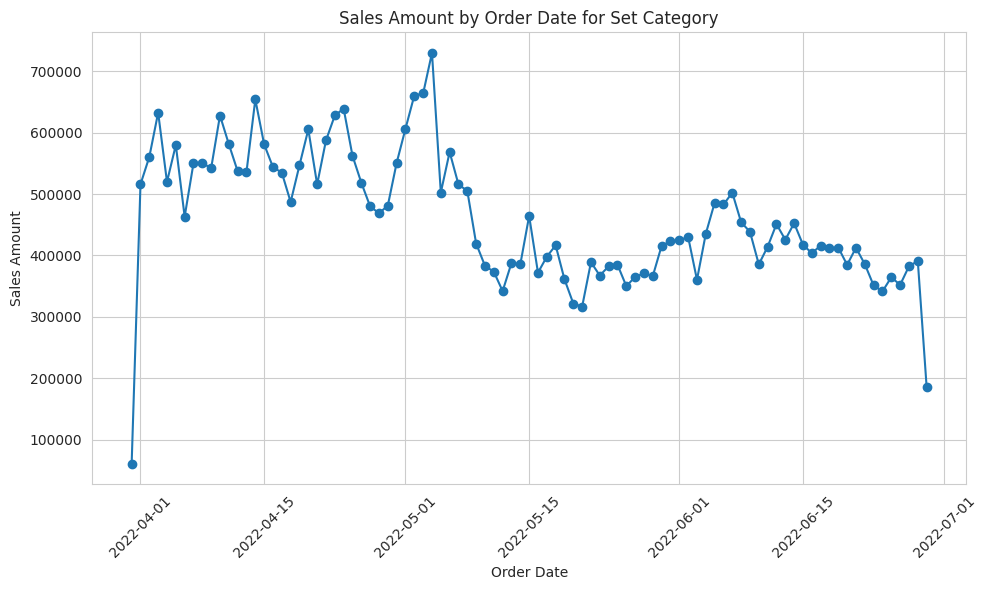

In [78]:
# Filter the dataset for the 'Set' category
set_category_df = amazon_df[amazon_df['Product_Category'] == 'Set'].copy()

# Convert the 'Date' column to datetime format with specified format
set_category_df.loc[:, 'Order_Date'] = pd.to_datetime(set_category_df['Order_Date'], errors='coerce')

# Group by date and sum the sales amount
sales_by_date = set_category_df.groupby('Order_Date').agg({'Sale_Amount': 'sum'}).reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Order_Date'], sales_by_date['Sale_Amount'], marker='o')
plt.title('Sales Amount by Order Date for Set Category')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the line chart
plt.show()

**Insights from Data**

In [79]:
# ======================
# DATA PREPARATION
# ======================
amazon_df['Order_Date'] = pd.to_datetime(amazon_df['Order_Date'])
amazon_df['month'] = amazon_df['Order_Date'].dt.month_name()
amazon_df['quarter'] = amazon_df['Order_Date'].dt.quarter
amazon_df['day_of_week'] = amazon_df['Order_Date'].dt.day_name()

# INR formatting function
def format_inr(amount):
    return f"₹{amount:,.2f}"

# ======================
# 1. REVENUE TRENDS
# ======================
print("="*50)
print("REVENUE TRENDS ANALYSIS".center(50))
print("="*50)

# Monthly revenue
monthly_revenue = amazon_df.groupby('month')['Sale_Amount'].sum()
print("\nMonthly Revenue:")
print(monthly_revenue.apply(format_inr))

# Quarterly revenue
quarterly_revenue = amazon_df.groupby('quarter')['Sale_Amount'].sum()
print("\nQuarterly Revenue:")
print(quarterly_revenue.apply(format_inr))

# ======================
# 2. PRODUCT PERFORMANCE
# ======================
print("\n" + "="*50)
print("PRODUCT PERFORMANCE".center(50))
print("="*50)

# Top selling categories
top_categories = amazon_df.groupby('Product_Category')['Sale_Amount'].sum()\
                         .sort_values(ascending=False).head(10)
print("\nTop 10 Product Categories by Revenue:")
print(top_categories.apply(format_inr))

# Category contribution
category_contribution = (amazon_df.groupby('Product_Category')['Sale_Amount'].sum() / 
                         amazon_df['Sale_Amount'].sum() * 100)\
                        .sort_values(ascending=False).head(5)
print("\nTop 5 Categories Contribution (% of total revenue):")
print(category_contribution.round(2).astype(str) + "%")

# ======================
# 3. OPERATIONAL METRICS
# ======================
print("\n" + "="*50)
print("OPERATIONAL METRICS".center(50))
print("="*50)

# Order status analysis
status_counts = amazon_df['Order_Status'].value_counts(normalize=True) * 100
print("\nOrder Status Distribution:")
print(status_counts.round(2).astype(str) + "%")

# Cancellation analysis
cancellation_rate = (amazon_df['Order_Status'].str.contains('Cancel', case=False).mean()) * 100
print(f"\nCancellation Rate: {cancellation_rate:.2f}%")
# Get order status distribution
status_data = amazon_df['Order_Status'].value_counts(normalize=True).reset_index()
status_data.columns = ['Order_Status', 'Percentage']
status_data['Percentage'] = status_data['Percentage'] * 100
status_data.to_csv('order_status.csv', index=False)

# ======================
# 4. CUSTOMER BEHAVIOR
# ======================
print("\n" + "="*50)
print("CUSTOMER BEHAVIOR".center(50))
print("="*50)

# Day of week pattern
dow_pattern = amazon_df.groupby('day_of_week')['Sale_Amount'].sum()
print("\nRevenue by Day of Week:")
print(dow_pattern.apply(format_inr))

# Business vs Consumer
if 'Business_to_Business' in amazon_df.columns:
    b2b_vs_b2c = amazon_df.groupby('Business_to_Business')['Sale_Amount'].mean()
    print("\nAverage Order Value:")
    print(b2b_vs_b2c.apply(format_inr))

# ======================
# 5. GEOGRAPHICAL ANALYSIS
# ======================
print("\n" + "="*50)
print("GEOGRAPHICAL ANALYSIS".center(50))
print("="*50)

if 'Shipping_State' in amazon_df.columns:
    top_states = amazon_df.groupby('Shipping_State')['Sale_Amount'].sum()\
                         .sort_values(ascending=False).head(5)
    print("\nTop 5 States by Revenue:")
    print(top_states.apply(format_inr))

# ======================
# 6. PROMOTION EFFECTIVENESS
# ======================
print("\n" + "="*50)
print("PROMOTION ANALYSIS".center(50))
print("="*50)

if 'Promo_Applied' in amazon_df.columns:
    promo_performance = amazon_df.groupby('Promo_Applied')['Sale_Amount'].mean()
    print("\nAverage Order Value with/without Promotion:")
    print(promo_performance.apply(format_inr))

             REVENUE TRENDS ANALYSIS              

Monthly Revenue:
month
April    ₹30,758,953.45
June     ₹24,884,273.44
March       ₹109,413.44
May      ₹27,871,294.22
Name: Sale_Amount, dtype: object

Quarterly Revenue:
quarter
1       ₹109,413.44
2    ₹83,514,521.12
Name: Sale_Amount, dtype: object

               PRODUCT PERFORMANCE                

Top 10 Product Categories by Revenue:
Product_Category
Set              ₹41,911,637.65
kurta            ₹22,688,270.48
Western Dress    ₹11,835,801.04
Top               ₹5,588,472.37
Ethnic Dress        ₹841,028.65
Blouse              ₹476,182.16
Bottom              ₹153,465.30
Saree               ₹128,161.90
Dupatta                 ₹915.00
Name: Sale_Amount, dtype: object

Top 5 Categories Contribution (% of total revenue):
Product_Category
Set              50.12%
kurta            27.13%
Western Dress    14.15%
Top               6.68%
Ethnic Dress      1.01%
Name: Sale_Amount, dtype: object

               OPERATIONAL METRICS        

In [80]:
# Prepare state-level data
state_revenue = amazon_df.groupby('Shipping_State')['Sale_Amount'].sum().reset_index()

# For Tableau:
state_revenue.to_csv('state_revenue.csv', index=False)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

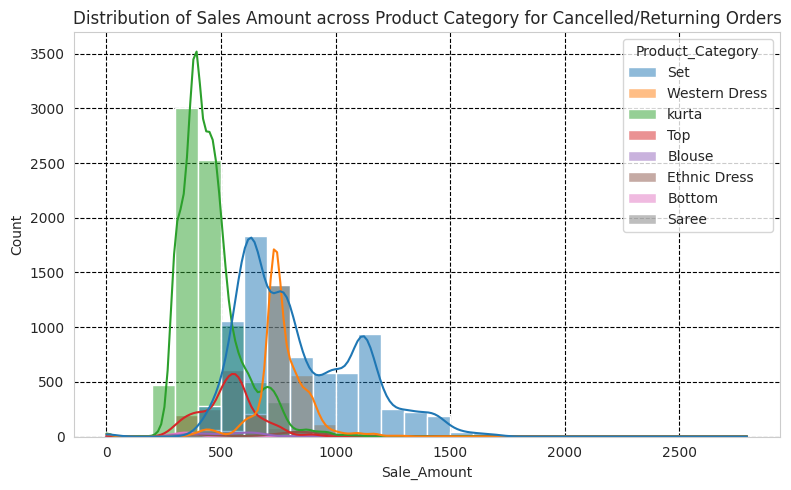

In [81]:
# Product Category by Order Status is 'Cancelled', 'Shipped - Rejected by Buyer', 'Shipped - Returned to Seller', 'Shipped - Returning to Seller'
fig, my_ax = plt.subplots(figsize=(8,5))
sns.histplot(data = amazon_df[amazon_df['Order_Status'].isin(['Cancelled', 'Shipped - Rejected by Buyer', 'Shipped - Returned to Seller', 'Shipped - Returning to Seller'])], x='Sale_Amount', ax=my_ax, binwidth=100, kde=True, hue='Product_Category')
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Product Category for Cancelled/Returning Orders")
plt.tight_layout()

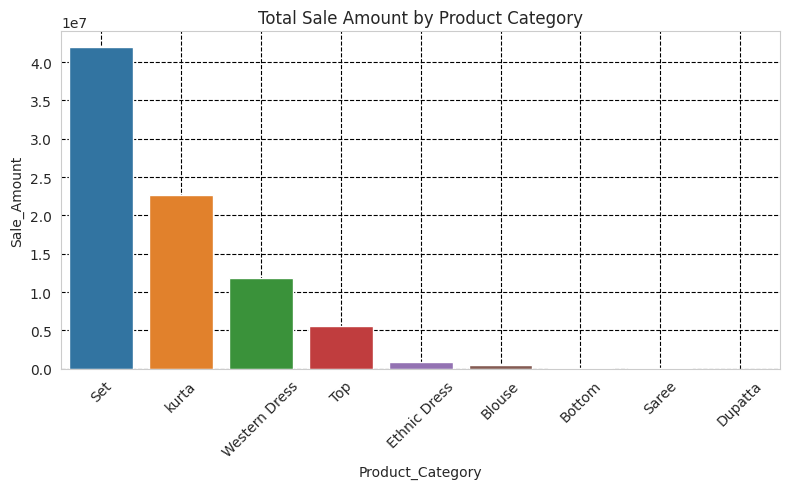

In [82]:
# Calculate the total amount of Sale Amount by Product Category and plot it

total_sale_amount = amazon_df.groupby('Product_Category')['Sale_Amount'].sum().reset_index()
total_sale_amount = total_sale_amount.sort_values(by='Sale_Amount', ascending=False)
fig, my_ax = plt.subplots(figsize=(8,5))
my_ax.set_ylabel('Sale Amount (in Millions)')
sns.barplot(data = total_sale_amount, x='Product_Category', y='Sale_Amount', ax=my_ax)
plt.xticks(rotation=45)
plt.grid(linestyle='--',color='#000000')
plt.title("Total Sale Amount by Product Category")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

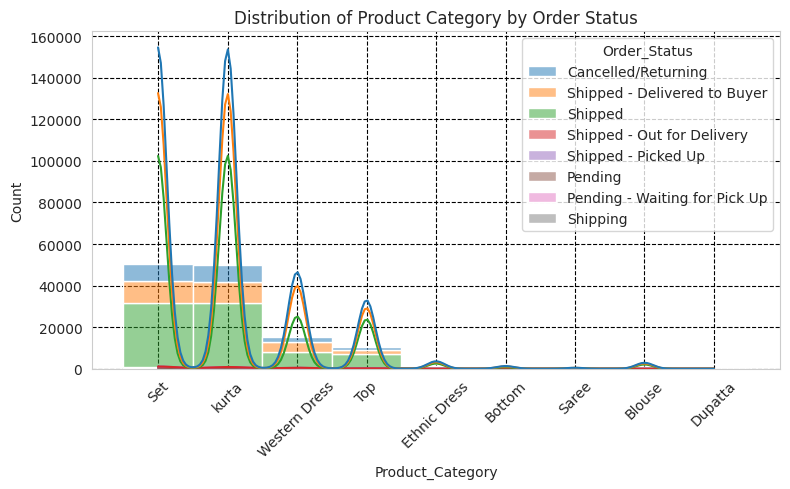

In [83]:
# Histogram comparing the Order Status where the status is 'Cancelled', 'Shipped - Rejected by Buyer', 'Shipped - Returned to Seller', 'Shipped - Returning to Seller' vs where the Order Status is others 
# by Product Category. X axis is Product Category, Y axis is Count of Orders in cancelled/returning orders compared to others

# Idea is to show category wise count of orders in cancelled/returning orders compared to others where the histogram is stacked
fig, my_ax = plt.subplots(figsize=(8,5))
amazon_df['Order_Status'] = amazon_df['Order_Status'].replace({'Cancelled': 'Cancelled/Returning', 'Shipped - Rejected by Buyer': 'Cancelled/Returning', 'Shipped - Returned to Seller': 'Cancelled/Returning', 'Shipped - Returning to Seller': 'Cancelled/Returning', 'Shipped - Damaged': 'Cancelled/Returning', 'Shipped - Lost in Transit': 'Cancelled/Returning'})
sns.histplot(data = amazon_df, x='Product_Category', ax=my_ax, binwidth=100, kde=True, hue='Order_Status', multiple='stack')
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Product Category by Order Status")
plt.xticks(rotation=45)
plt.tight_layout()

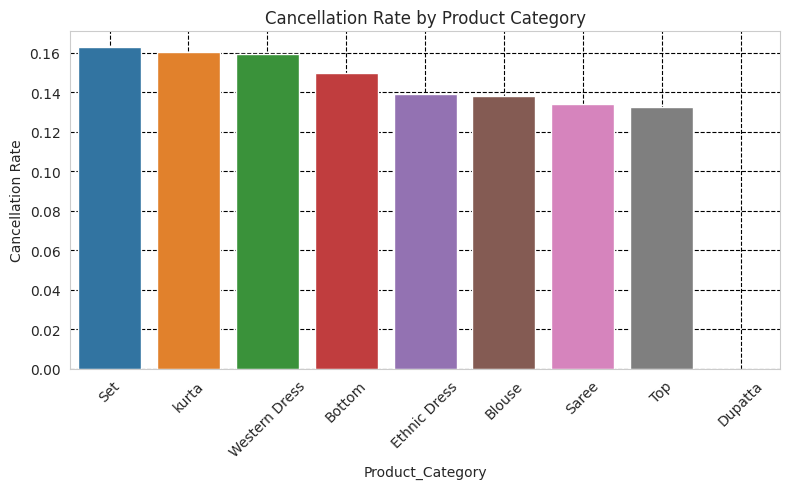

In [84]:
# Cancellation Rate by Product Category
cancellation_rate = amazon_df.groupby('Product_Category')['Order_Status'].value_counts(normalize=True).unstack().fillna(0)
cancellation_rate = cancellation_rate.rename(columns={'Cancelled/Returning': 'Cancellation Rate'})
cancellation_rate = cancellation_rate.reset_index()
fig, my_ax = plt.subplots(figsize=(8,5))
cancellation_rate = cancellation_rate.sort_values(by='Cancellation Rate', ascending=False)
sns.barplot(data = cancellation_rate, x='Product_Category', y='Cancellation Rate', ax=my_ax)
plt.xticks(rotation=45)
plt.grid(linestyle='--',color='#000000')
plt.title("Cancellation Rate by Product Category")
plt.tight_layout()

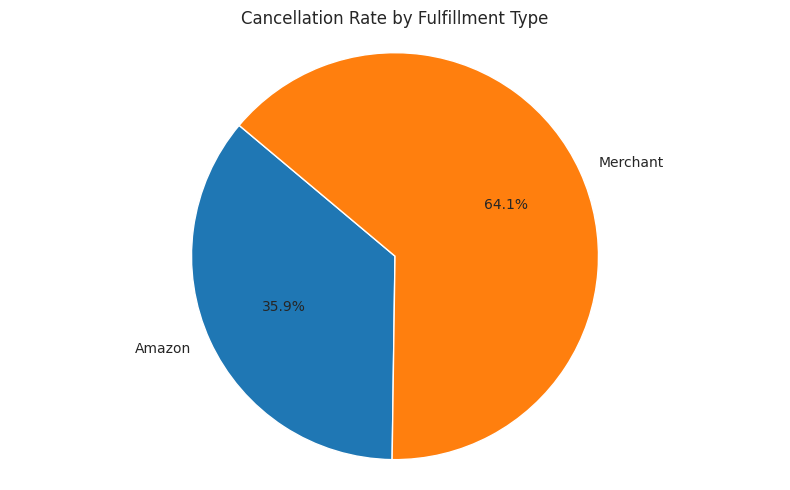

In [85]:
# Cancellation by Fulfillment Type - Pie Chart since there are only 2 categories
cancellation_rate = amazon_df.groupby('Fulfillment_Type')['Order_Status'].value_counts(normalize=True).unstack().fillna(0)
cancellation_rate = cancellation_rate.rename(columns={'Cancelled/Returning': 'Cancellation Rate'})
cancellation_rate = cancellation_rate.reset_index()
cancellation_rate = cancellation_rate.set_index('Fulfillment_Type')
cancellation_rate = cancellation_rate['Cancellation Rate'].reset_index()

# Plotting the pie chart
fig, my_ax = plt.subplots(figsize=(8,5))
plt.pie(cancellation_rate['Cancellation Rate'], labels=cancellation_rate['Fulfillment_Type'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Cancellation Rate by Fulfillment Type")
plt.tight_layout()


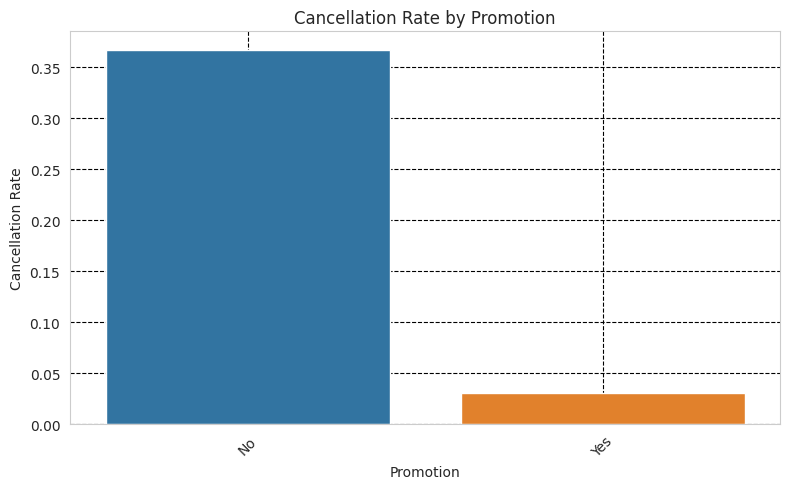

In [86]:
# Cancellation Rate by Promotion in Percentage
cancellation_rate = amazon_df.groupby('Promotion')['Order_Status'].value_counts(normalize=True).unstack().fillna(0)
cancellation_rate = cancellation_rate.rename(columns={'Cancelled/Returning': 'Cancellation Rate'})
cancellation_rate = cancellation_rate.reset_index()
fig, my_ax = plt.subplots(figsize=(8,5))
cancellation_rate = cancellation_rate.sort_values(by='Cancellation Rate', ascending=False)
sns.barplot(data = cancellation_rate, x='Promotion', y='Cancellation Rate', ax=my_ax)
plt.xticks(rotation=45)
plt.grid(linestyle='--',color='#000000')
plt.title("Cancellation Rate by Promotion")
plt.tight_layout()

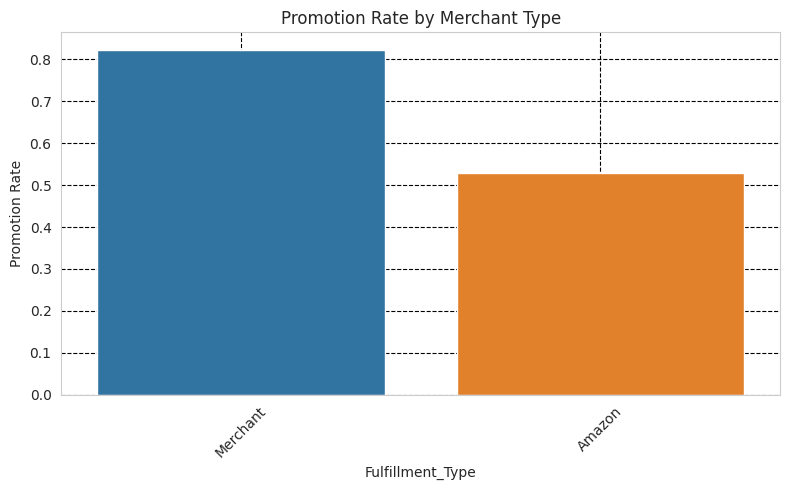

In [87]:
# Proportion of Promotion by Fulfillment Type
promotion_rate = amazon_df.groupby('Fulfillment_Type')['Promotion'].value_counts(normalize=True).unstack().fillna(0)
promotion_rate = promotion_rate.rename(columns={'Yes': 'Promotion Rate'})
promotion_rate = promotion_rate.reset_index()
fig, my_ax = plt.subplots(figsize=(8,5))
promotion_rate = promotion_rate.sort_values(by='Promotion Rate', ascending=False)
sns.barplot(data = promotion_rate, x='Fulfillment_Type', y='Promotion Rate', ax=my_ax)
plt.xticks(rotation=45)
plt.grid(linestyle='--',color='#000000')
plt.title("Promotion Rate by Merchant Type")
plt.tight_layout()

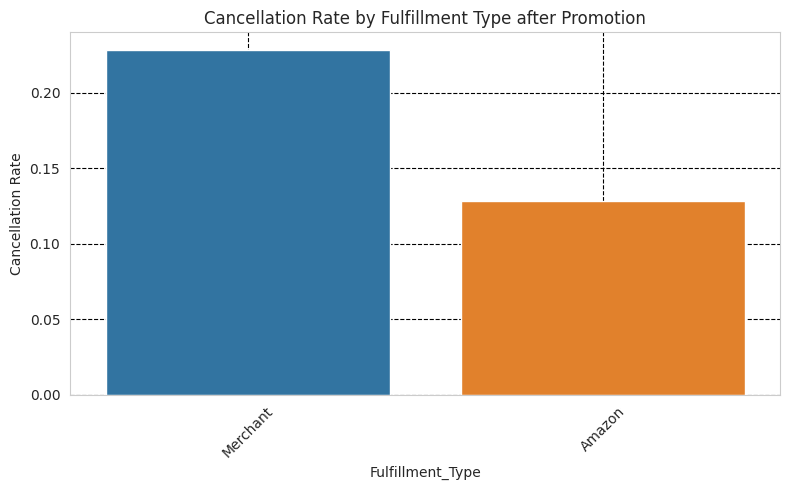

In [88]:
# Percentage of Cancellation by Fulfillment Type after Promotion
cancellation_rate = amazon_df.groupby('Fulfillment_Type')['Order_Status'].value_counts(normalize=True).unstack().fillna(0)
cancellation_rate = cancellation_rate.rename(columns={'Cancelled/Returning': 'Cancellation Rate'})
cancellation_rate = cancellation_rate.reset_index()
fig, my_ax = plt.subplots(figsize=(8,5))
cancellation_rate = cancellation_rate.sort_values(by='Cancellation Rate', ascending=False)
sns.barplot(data = cancellation_rate, x='Fulfillment_Type', y='Cancellation Rate', ax=my_ax)
plt.xticks(rotation=45)
plt.grid(linestyle='--',color='#000000')
plt.title("Cancellation Rate by Fulfillment Type after Promotion")
plt.tight_layout()

In [89]:
# Ensure Gross_Amount is numeric
international_df_final['Gross_Amount'] = pd.to_numeric(international_df_final['Gross_Amount'], errors='coerce')

**Customer Insights**

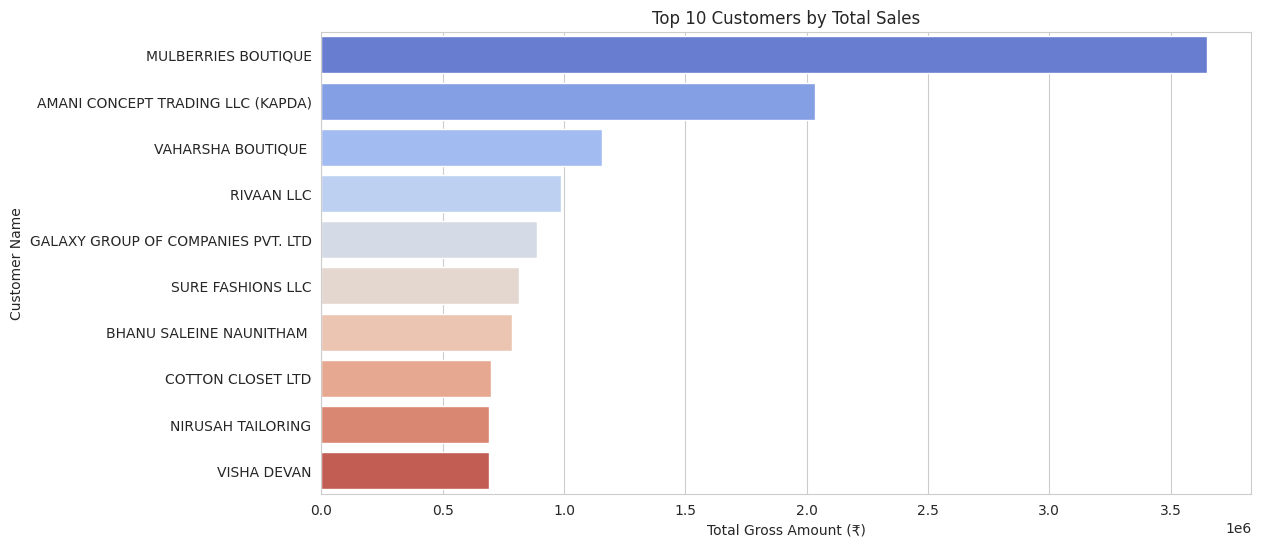

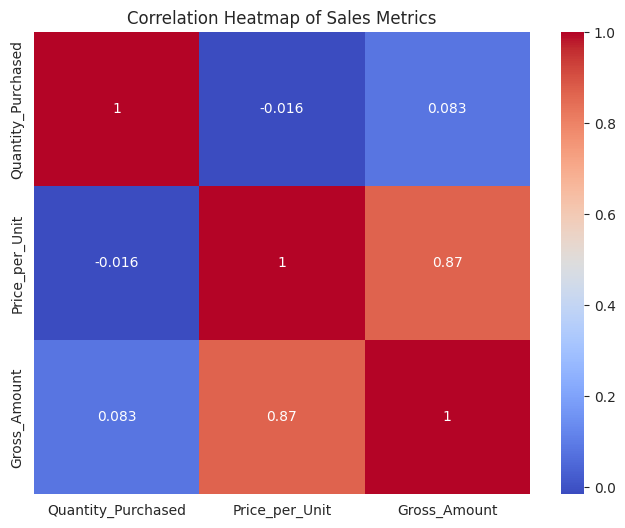

In [90]:
# 1. Top Customers
top_customers = international_df_final.groupby('Customer_Name')['Gross_Amount'].sum().reset_index()
top_customers.sort_values(by='Gross_Amount', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Gross_Amount', y='Customer_Name', data=top_customers.head(10), palette='coolwarm')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Gross Amount (₹)')
plt.ylabel('Customer Name')
plt.show()


# 2. Correlation Heatmap
correlation_matrix = international_df_final[['Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Sales Metrics')
plt.show()


**Merged Amazon Sales Report With International Sales Report**

In [91]:
# Rename columns for clarity
international_df_final = international_df_final.rename(
    columns={'Price_per_Unit': 'Original_Price'}
)
# Perform inner join on Product_SKU
merged_data = pd.merge(
    amazon_df[['Product_SKU', 'Sale_Amount', 'Quantity']],
    international_df_final[['Product_SKU', 'Original_Price', 'Quantity_Purchased']],
    on='Product_SKU',
    how='inner'
)

# Check if merge succeeded
if merged_data.empty:
    print("Warning: No matching SKUs found between datasets!")
else:
    print(f"Merged {len(merged_data)} records")
    
    # Filter and display only rows where Quantity is not 0
    non_zero_quantity = merged_data[merged_data['Quantity'] != 0]
    
    if non_zero_quantity.empty:
        print("\nAll rows have Quantity = 0")
    else:
        print(f"\nFound {len(non_zero_quantity)} rows with non-zero Quantity:")
        print(non_zero_quantity)

Merged 778604 records

Found 705006 rows with non-zero Quantity:
            Product_SKU  Sale_Amount  Quantity Original_Price  \
4         JNE3371-KR-XL        329.0         1         556.25   
5         JNE3371-KR-XL        329.0         1         556.25   
16      JNE3671-TU-XXXL        574.0         1          512.5   
17      JNE3671-TU-XXXL        574.0         1            500   
18      JNE3671-TU-XXXL        574.0         1          512.5   
...                 ...          ...       ...            ...   
778599     J0012-SKD-XS       1199.0         1         1387.5   
778600      J0003-SET-S        696.0         1          737.5   
778601      J0003-SET-S        696.0         1          737.5   
778602      J0003-SET-S        696.0         1          737.5   
778603      J0003-SET-S        696.0         1          737.5   

       Quantity_Purchased  
4                       1  
5                       1  
16                      1  
17                      1  
18            

In [92]:
# First ensure datetime conversion
#amazon_df['Order_Date'] = pd.to_datetime(amazon_df['Order_Date'])
international_df_final['Sale_Date'] = pd.to_datetime(international_df_final['Sale_Date'])

# Extract quarter/year
amazon_df['Quarter'] = amazon_df['Order_Date'].dt.to_period('Q')
international_df_final['Quarter'] = international_df_final['Sale_Date'].dt.to_period('Q')

# Verify available quarters
print("Amazon quarters:", amazon_df['Quarter'].unique())
print("International quarters:", international_df_final['Quarter'].unique())

# 1. DISCOUNT ANALYSIS (using unique SKUs from full dataset)
# --------------------------------------------------------
# Get latest price for each SKU (deduplicate)
latest_prices = international_df_final.sort_values('Sale_Date').drop_duplicates('Product_SKU', keep='last')
discount_analysis = pd.merge(
    amazon_df[['Product_SKU', 'Sale_Amount']],
    latest_prices[['Product_SKU', 'Original_Price']],
    on='Product_SKU',
    how='inner'
)
# Convert Original_Price and Sale_Amount to numeric
discount_analysis['Original_Price'] = pd.to_numeric(discount_analysis['Original_Price'], errors='coerce')
discount_analysis['Sale_Amount'] = pd.to_numeric(discount_analysis['Sale_Amount'], errors='coerce')

# Calculate discount
discount_analysis['Discount_Pct'] = ((discount_analysis['Original_Price'] - discount_analysis['Sale_Amount']) / 
                                   discount_analysis['Original_Price']) * 100

print(f"\nDiscount analysis on {len(discount_analysis)} unique SKUs:")
print(f"Average discount: {discount_analysis['Discount_Pct'].mean():.2f}%")
print(f"Median discount: {discount_analysis['Discount_Pct'].median():.2f}%")

# 2. SIZE ANALYSIS (Q2 2022 overlap) - Debugging why empty
# --------------------------------------------------------
# Check if there's any Q2 2022 data at all
print("\nChecking Q2 2022 data availability:")
print("Amazon Q2 2022 records:", len(amazon_df[amazon_df['Quarter'] == '2022Q2']))
print("International Q2 2022 records:", len(international_df_final[international_df_final['Quarter'] == '2022Q2']))

Amazon quarters: <PeriodArray>
['2022Q2', '2022Q1']
Length: 2, dtype: period[Q-DEC]
International quarters: <PeriodArray>
['2021Q2', '2021Q3', '2021Q4', '2022Q1']
Length: 4, dtype: period[Q-DEC]

Discount analysis on 79159 unique SKUs:
Average discount: 11.65%
Median discount: 12.45%

Checking Q2 2022 data availability:
Amazon Q2 2022 records: 128771
International Q2 2022 records: 0


**Sales Report Size Overview**

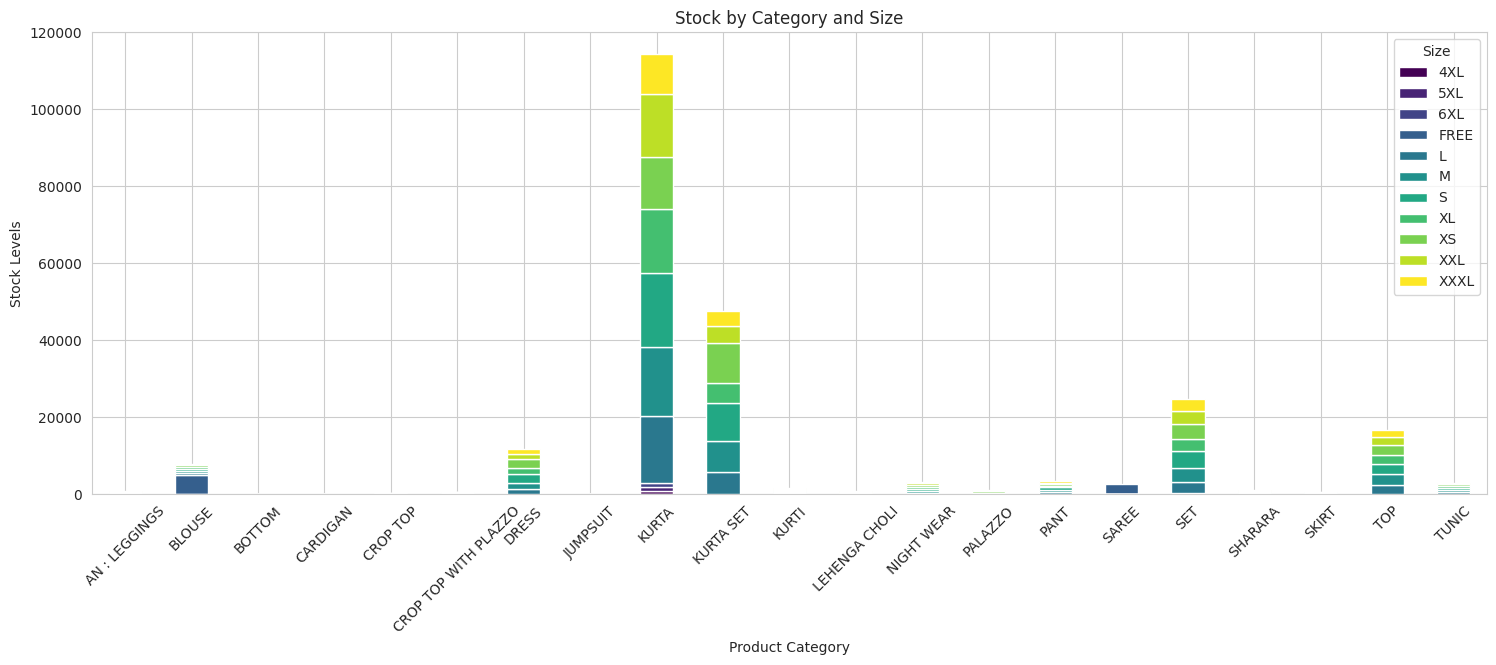

In [93]:
stock_by_size_and_category = sales_df.groupby(['Product_Category', 'Product_Size'])['Stock_Level'].sum().unstack().fillna(0)
stock_by_size_and_category.plot(kind='bar', stacked=True, figsize=(18, 6), colormap='viridis')
plt.title('Stock by Category and Size')
plt.xlabel('Product Category')
plt.ylabel('Stock Levels')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.grid(True)
plt.show()

**Profit and Loss May 2022 Data Analysis**

In [94]:
# We have transfer price, old MRP and Final_Old_MRP(which is the new MRP), we can calculate the profit margin

# Convert Transfer_Price and Final_Old_MRP to numeric values
may2022_df['Transfer_Price'] = pd.to_numeric(may2022_df['Transfer_Price'], errors='coerce')
may2022_df['Final_Old_MRP'] = pd.to_numeric(may2022_df['Final_Old_MRP'], errors='coerce')

# Calculate profit margin
may2022_df['Profit_Margin_Amount'] = (may2022_df['Final_Old_MRP'] - may2022_df['Transfer_Price']) 

# Calculate profit margin percentage
may2022_df['Profit_Margin_Percentage'] = (may2022_df['Profit_Margin_Amount'] / may2022_df['Transfer_Price']) * 100

# Display the first few rows with profit margin
print("Profit Margin Calculation:")
print(may2022_df[['Product_SKU', 'Transfer_Price', 'Final_Old_MRP', 'Profit_Margin_Amount']].head())
print("\n")

Profit Margin Calculation:
      Product_SKU  Transfer_Price  Final_Old_MRP  Profit_Margin_Amount
0    Os206_3141_S           538.0         2295.0                1757.0
1    Os206_3141_M           538.0         2295.0                1757.0
2    Os206_3141_L           538.0         2295.0                1757.0
3   Os206_3141_XL           538.0         2295.0                1757.0
4  Os206_3141_2XL           538.0         2295.0                1757.0




In [95]:
# Product_SKU is unique and Product_Style_ID is not unique, so we can group by Product_Style_ID and get the average profit margin
# Group by Product_Style_ID and calculate average profit margin. Include Product_Category for better understanding
average_profit_margin = may2022_df.groupby(['Product_Style_ID', 'Product_Category'])['Profit_Margin_Percentage'].mean().reset_index()
average_profit_margin = average_profit_margin.rename(columns={'Profit_Margin_Percentage': 'Average_Profit_Margin_Percentage'})
print("Average Profit Margin by Product Style ID and Category:")
print(average_profit_margin.head())
print("\n")

Average Profit Margin by Product Style ID and Category:
                       Product_Style_ID Product_Category  \
0        3pl Cottom Face Mask Pack of 3             Nill   
1  3pl reusable cotton mask - Pack of 5             Nill   
2                    BIG CHECKS - 1 BAG             Nill   
3                           COPPER-1276             Nill   
4                           FOUR GEMS-2             Nill   

   Average_Profit_Margin_Percentage  
0                         99.000000  
1                         99.333333  
2                          0.000000  
3                        251.658291  
4                         88.542825  




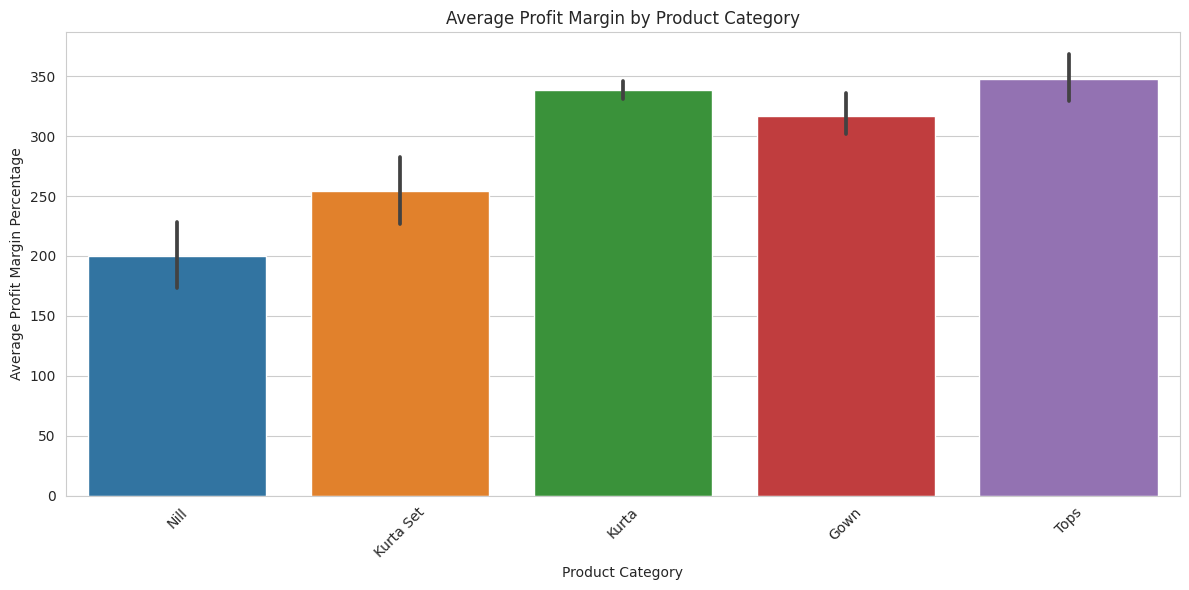

In [96]:
# Plotting the average profit margin by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(data=average_profit_margin, x='Product_Category', y='Average_Profit_Margin_Percentage')
plt.title('Average Profit Margin by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Average Profit Margin Percentage')
plt.tight_layout()
plt.savefig('profit_margin_analysis_may2022.png', 
           dpi=300, 
           bbox_inches='tight')
plt.show()


In [97]:
# Calculate total profit per category
profit_by_category = may2022_df.groupby('Product_Category')['Profit_Margin_Amount'].sum().sort_values()

# Calculate average margin per category
avg_margin_by_category = may2022_df.groupby('Product_Category')['Profit_Margin_Percentage'].mean()

In [98]:
'''total_profit = may2022_df['Profit_Margin_Amount'].sum()
print(f"Total Profit (All Products): ₹{total_profit:,.2f}")
'''

'total_profit = may2022_df[\'Profit_Margin_Amount\'].sum()\nprint(f"Total Profit (All Products): ₹{total_profit:,.2f}")\n'

In [99]:
'''
profit_by_category = may2022_df.groupby('Product_Category')['Profit_Margin_Amount'].sum()
print("\nProfit by Category:")
print(profit_by_category.to_string(float_format='₹{:,.2f}'.format))
'''

'\nprofit_by_category = may2022_df.groupby(\'Product_Category\')[\'Profit_Margin_Amount\'].sum()\nprint("\nProfit by Category:")\nprint(profit_by_category.to_string(float_format=\'₹{:,.2f}\'.format))\n'

**Top Profit and Average Margin**

In [100]:
'''
plt.figure(figsize=(14, 8))

# Bar plot for total profits
ax1 = sns.barplot(x=profit_by_category.index, 
                 y=profit_by_category.values,
                 color='skyblue',
                 label='Total Profit (₹)')

# Line plot for average margins
ax2 = plt.twinx()
sns.lineplot(x=avg_margin_by_category.index,
            y=avg_margin_by_category.values,
            color='crimson',
            marker='o',
            linewidth=2.5,
            markersize=10,
            ax=ax2,
            label='Avg Margin %')

# Formatting
plt.title('Total Profit & Average Margin by Product Category\n(May 2022)', pad=20, fontsize=14)
ax1.set_ylabel('Total Profit (₹)', color='skyblue')
ax2.set_ylabel('Average Margin %', color='crimson')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(profit_by_category):
    ax1.text(i, v, f'₹{v:,.0f}', 
            ha='center', 
            va='bottom',
            fontweight='bold')

for i, v in enumerate(avg_margin_by_category):
    ax2.text(i, v, f'{v:.1f}%', 
            ha='center', 
            va='center',
            color='white',
            bbox=dict(facecolor='crimson', alpha=0.7))

plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('profit_analysis_may2022.png', 
           dpi=300, 
           bbox_inches='tight')
plt.show()
'''

"\nplt.figure(figsize=(14, 8))\n\n# Bar plot for total profits\nax1 = sns.barplot(x=profit_by_category.index, \n                 y=profit_by_category.values,\n                 color='skyblue',\n                 label='Total Profit (₹)')\n\n# Line plot for average margins\nax2 = plt.twinx()\nsns.lineplot(x=avg_margin_by_category.index,\n            y=avg_margin_by_category.values,\n            color='crimson',\n            marker='o',\n            linewidth=2.5,\n            markersize=10,\n            ax=ax2,\n            label='Avg Margin %')\n\n# Formatting\nplt.title('Total Profit & Average Margin by Product Category\n(May 2022)', pad=20, fontsize=14)\nax1.set_ylabel('Total Profit (₹)', color='skyblue')\nax2.set_ylabel('Average Margin %', color='crimson')\nax1.tick_params(axis='x', rotation=45)\nax1.grid(axis='y', linestyle='--', alpha=0.7)\n\n# Add value labels\nfor i, v in enumerate(profit_by_category):\n    ax1.text(i, v, f'₹{v:,.0f}', \n            ha='center', \n            va=

**Product Color Analysis by merging Amazon Sales Report and Sales Report**

In [101]:
# Merge on Product_SKU using an inner join
merged_df = amazon_df.merge(sale_report_df, on='Product_SKU', how='inner', suffixes=('_amazon', '_sale'))

# Display merged data
print(merged_df.head())


   index_amazon             Order_ID Order_Date                  Order_Status  \
0             0  405-8078784-5731545 2022-04-30           Cancelled/Returning   
1             1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2             2  404-0687676-7273146 2022-04-30                       Shipped   
3             3  403-9615377-8133951 2022-04-30           Cancelled/Returning   
4             4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfillment_Type Sales_Channel Shipping_Service_Level Product_Style  \
0         Merchant     Amazon.in               Standard        SET389   
1         Merchant     Amazon.in               Standard       JNE3781   
2           Amazon     Amazon.in              Expedited       JNE3371   
3         Merchant     Amazon.in               Standard         J0341   
4           Amazon     Amazon.in              Expedited       JNE3671   

       Product_SKU Product_Category_amazon  ...  month quarter day_of_week

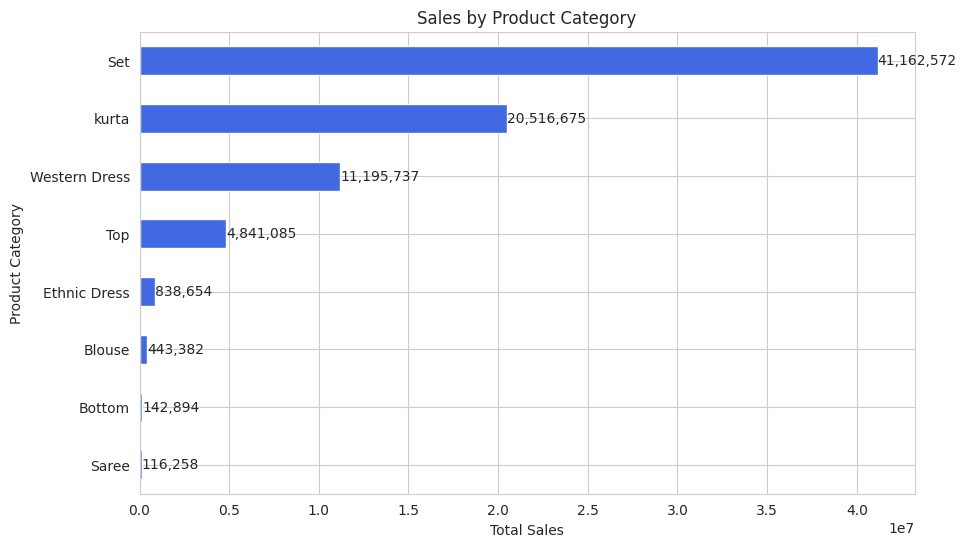

In [102]:
# Group sales by category
category_sales = merged_df.groupby("Product_Category_amazon")["Sale_Amount"].sum().sort_values()

# Plot
plt.figure(figsize=(10, 6))
category_sales.plot(kind='barh', color='royalblue')

# Labels & Title
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.title("Sales by Product Category")

# Add data labels
for i, v in enumerate(category_sales):
    plt.text(v + 1000, i, f"{v:,.0f}", va='center', fontsize=10)

plt.show()


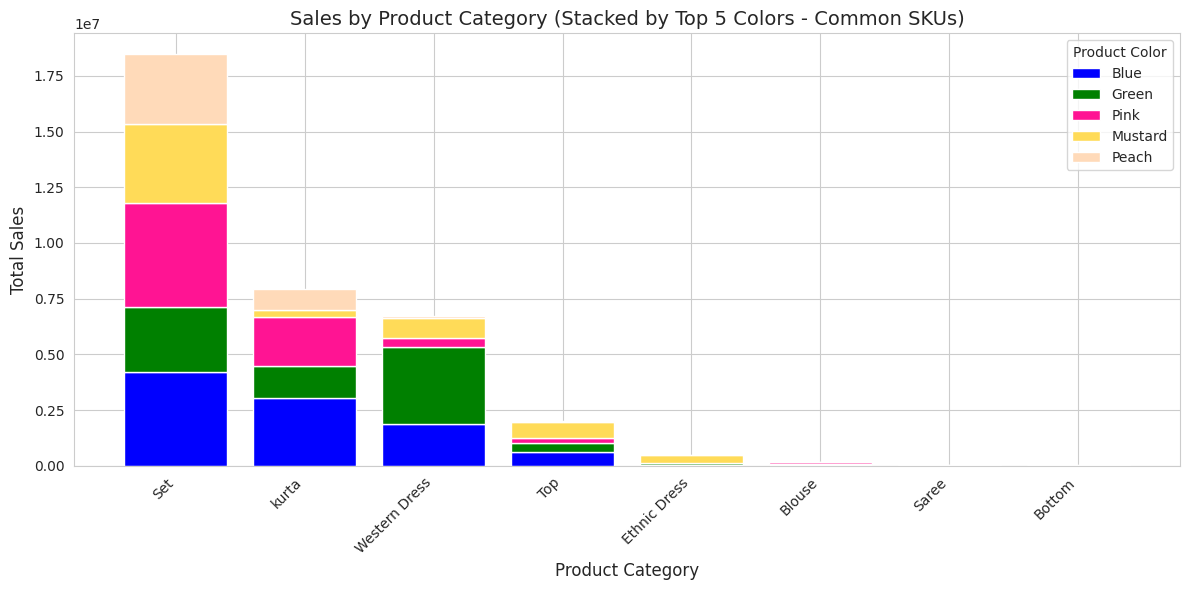

In [103]:
# Identify common SKUs
common_skus = set(merged_df["Product_SKU"])

# Filter dataset to only keep rows where SKU is common
common_sku_df = merged_df[merged_df["Product_SKU"].isin(common_skus)]

# Get top 5 colors by total sales
top_colors = (
    common_sku_df.groupby("Product_Color")["Sale_Amount"]
    .sum()
    .nlargest(5)
    .index
)

# Filter dataset for only top 5 colors
filtered_df = common_sku_df[common_sku_df["Product_Color"].isin(top_colors)]

# Group sales by Product Category & Product Color
category_sales = (
    filtered_df.groupby(["Product_Category_amazon", "Product_Color"])["Sale_Amount"]
    .sum()
    .reset_index()
)

# Sort categories by total sales
category_sales["Total_Sales"] = category_sales.groupby("Product_Category_amazon")["Sale_Amount"].transform("sum")
category_sales = category_sales.sort_values("Total_Sales", ascending=False)

# Define a fixed color mapping (use actual dataset color names)
color_map = {
    "Blue": "blue",
    "Green": "green",
    "Pink": "#FF1493",  # Light Pink Hex Code
    "Mustard": "#FFDB58",  # Mustard Yellow
    "Peach": "#FFDAB9",  # Peach Color
}

# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique categories
categories = category_sales["Product_Category_amazon"].unique()

# Get bar positions
x = np.arange(len(categories))

# Stack bars
bottom = np.zeros(len(categories))

for color in top_colors:
    sales = [
        category_sales.loc[
            (category_sales["Product_Category_amazon"] == category) &
            (category_sales["Product_Color"] == color), "Sale_Amount"
        ].sum()
        for category in categories
    ]
    
    ax.bar(
        x, sales,
        label=color,
        color=color_map.get(color, "gray"),  # Use color_map, default to gray if not found
        bottom=bottom
    )
    
    # Update bottom position for stacking
    bottom += np.array(sales)

# Labels & Title
ax.set_xlabel("Product Category", fontsize=12)
ax.set_ylabel("Total Sales", fontsize=12)
ax.set_title("Sales by Product Category (Stacked by Top 5 Colors - Common SKUs)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right", fontsize=10)
ax.legend(title="Product Color")

plt.tight_layout()
plt.show()


In [104]:
color_counts = merged_df["Product_Color"].value_counts()
print(color_counts)

Product_Color
Blue               14266
Green              12544
Pink               11217
Mustard             8131
Black               7412
Teal                6806
Peach               6459
Maroon              4488
Light Green         4471
Grey                4036
White               3909
OFF WHITE           3564
Navy Blue           3443
Red                 3100
Orange              2995
Yellow              2586
Cream               2427
Turquoise Blue      2117
Multicolor          1616
Brown               1409
Magenta             1394
Sea Green           1350
Olive Green         1197
Light Pink           932
Gold                 929
Beige                846
Turquoise            781
Light Brown          629
Wine                 608
Olive                561
TEAL GREEN           513
Mauve                478
TEAL BLUE            442
Sky Blue             420
Rust                 398
Dark Green           361
Indigo               357
Purple               312
CORAL                306
Dark Blue  

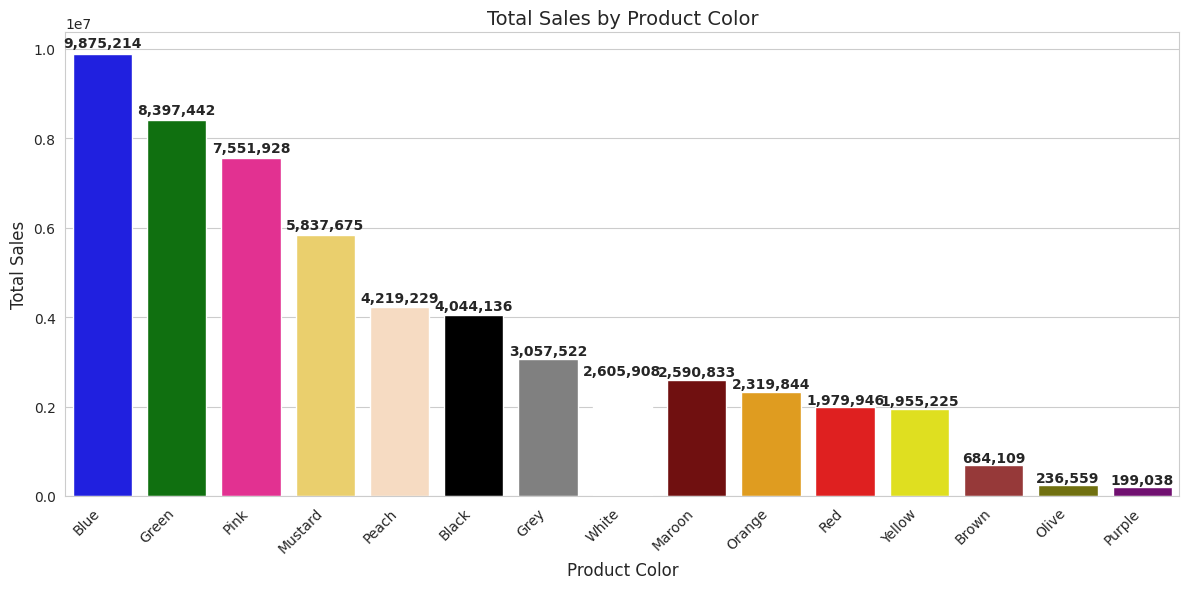

In [105]:
# Aggregate total sales per color
color_sales = merged_df.groupby("Product_Color")["Sale_Amount"].sum().sort_values(ascending=False)

# Define exact color mappings
color_map = {
    "Blue": "blue",
    "Green": "green",
    "Pink": "#FF1493",      # Deep pink
    "Mustard": "#FFDB58",   # Mustard yellow
    "Peach": "#FFDAB9",     # Peach
    "Red": "red",
    "Black": "black",
    "White": "white",
    "Yellow": "yellow",
    "Grey": "gray",
    "Orange": "orange",
    "Purple": "purple",
    "Brown": "brown",
    "Maroon": "#800000",    # Maroon
    "Olive": "#808000"      # Olive green
    # Add more if needed
}

# Filter to only those colors we can map
colors_in_data = [color for color in color_sales.index if color in color_map]
filtered_sales = color_sales.loc[colors_in_data]
filtered_palette = [color_map[color] for color in colors_in_data]

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=filtered_sales.index, y=filtered_sales.values, palette=filtered_palette)

# Add labels on top of bars
for i, v in enumerate(filtered_sales.values):
    ax.text(i, v + (0.01 * v), f'{int(v):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Product Color", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Product Color", fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-106-53bfe8559361>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_color_df["Month"] = top_color_df["Sale_Date"].dt.to_period("M").dt.to_timestamp()


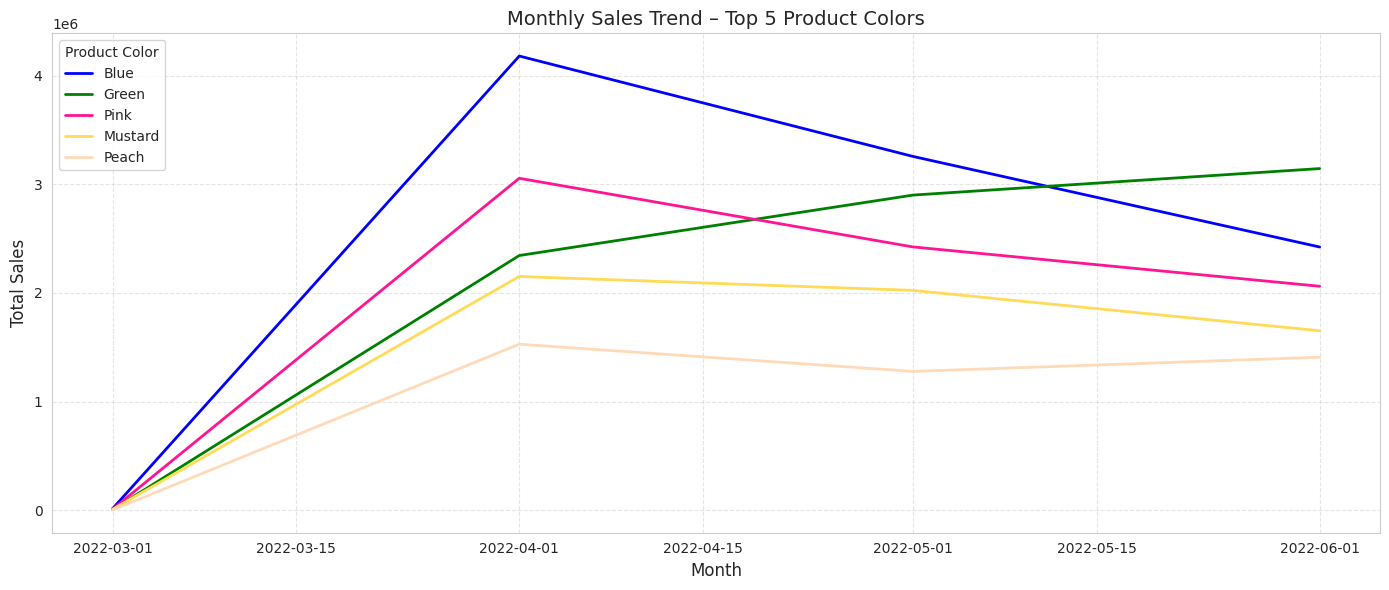

In [106]:
# Ensure Sale_Date is datetime
merged_df["Sale_Date"] = pd.to_datetime(merged_df["Sale_Date"])

# Get top 5 colors by total sales
top_colors = merged_df.groupby("Product_Color")["Sale_Amount"].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter to top 5 colors
top_color_df = merged_df[merged_df["Product_Color"].isin(top_colors)]

# Group by month for smoother trend (you can change to daily if needed)
top_color_df["Month"] = top_color_df["Sale_Date"].dt.to_period("M").dt.to_timestamp()
color_trends = top_color_df.groupby(["Month", "Product_Color"])["Sale_Amount"].sum().unstack().fillna(0)

# Use exact colors
color_map = {
    "Blue": "blue",
    "Green": "green",
    "Pink": "#FF1493",      # Deep pink
    "Mustard": "#FFDB58",
    "Peach": "#FFDAB9",
    "Red": "red",
    "Black": "black",
    "White": "white",
    "Grey": "gray",
    "Yellow": "yellow",
    "Orange": "orange",
    "Purple": "purple",
    "Brown": "brown",
    "Maroon": "#800000",
    "Olive": "#808000"
}

# Plot
plt.figure(figsize=(14, 6))
for color in top_colors:
    plt.plot(color_trends.index, color_trends[color], label=color, color=color_map.get(color, 'gray'), linewidth=2)

plt.title("Monthly Sales Trend – Top 5 Product Colors", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Product Color")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
